Подготовил Максим Кашурин ML Технопарк

In [79]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#for ML
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb # XGBoost stands for “Extreme Gradient Boosting. 


# Model Evaluation

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, f1_score, accuracy_score, recall_score, roc_auc_score, roc_curve
import xgboost as xgb
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix

 

 
Признаки

1. возраст | количество лет, прожитых человеком
2. пол | гендер пациента (мужчина:1/Женщина:0)
3. тип cp | боли в груди (4 значения)
4. Частота сердечных сокращений | Кровяное давление в состоянии покоя
5. холестерин|холесторал в сыворотке крови в мг/дл
6. fbs | Уровень сахара в крови натощак > 120 мг/дл
7. результаты повторной ЭКГ | электрокардиографии в состоянии покоя (ЭКГ) (значения 0,1,2)
8. талах | Достигнутая максимальная частота сердечных сокращений
9. Стенокардия, вызванная физической нагрузкой
10. олдпик | oldpeak = депрессия ST, вызванная физической нагрузкой по сравнению с отдыхом
11. наклон | наклон сегмента ST пикового упражнения
12. ca | количество крупных сосудов (0-3), окрашенных флуороскопией
13. результаты стресс-теста на таль | талий: 3 = норма; 6 = исправленный дефект; 7 = обратимый дефект
ЦЕЛЕВАЯ ПЕРЕМЕННАЯ

Целевая переменная из исходного набора
данных условие: диагноз заболевания сердца (ангиографический статус заболевания)
Значение 0: сужение диаметра < 50% (отрицательное для заболевания)
Значение 1: сужение диаметра > 50% (положительный результат на заболевание) 

In [80]:
df =pd.read_csv('heart_cleveland_upload.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [81]:
df.describe().T.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
age,297.000000,54.542088,9.049736,29.000000,48.000000,56.000000,61.000000,77.000000
sex,297.000000,0.676768,0.468500,0.000000,0.000000,1.000000,1.000000,1.000000
cp,297.000000,2.158249,0.964859,0.000000,2.000000,2.000000,3.000000,3.000000
trestbps,297.000000,131.693603,17.762806,94.000000,120.000000,130.000000,140.000000,200.000000
chol,297.000000,247.350168,51.997583,126.000000,211.000000,243.000000,276.000000,564.000000
fbs,297.000000,0.144781,0.352474,0.000000,0.000000,0.000000,0.000000,1.000000
restecg,297.000000,0.996633,0.994914,0.000000,0.000000,1.000000,2.000000,2.000000
thalach,297.000000,149.599327,22.941562,71.000000,133.000000,153.000000,166.000000,202.000000
exang,297.000000,0.326599,0.469761,0.000000,0.000000,0.000000,1.000000,1.000000
oldpeak,297.000000,1.055556,1.166123,0.000000,0.000000,0.800000,1.600000,6.200000


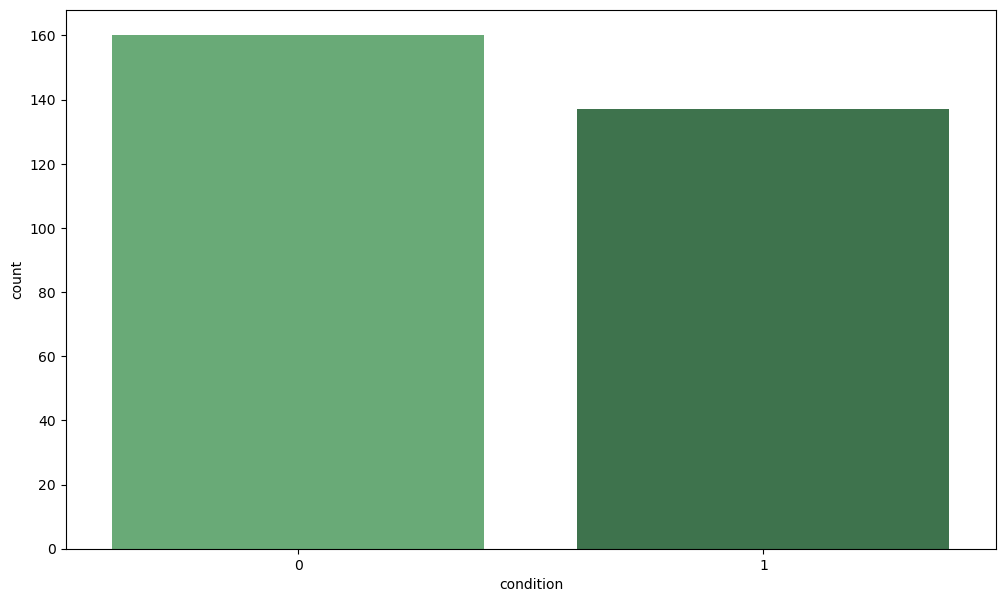

In [82]:


plt.figure(figsize=(12,7))
sns.countplot(x='condition',data=df,palette='Greens_d')
plt.show()



In [83]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.120795,0.227075
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.370556,0.278467
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.266275,0.408945
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.130612,0.153490
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.023441,0.080285
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.051038,0.003167
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.013612,0.166343
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.258386,-0.423817
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.323268,0.421355
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.336809,0.424052


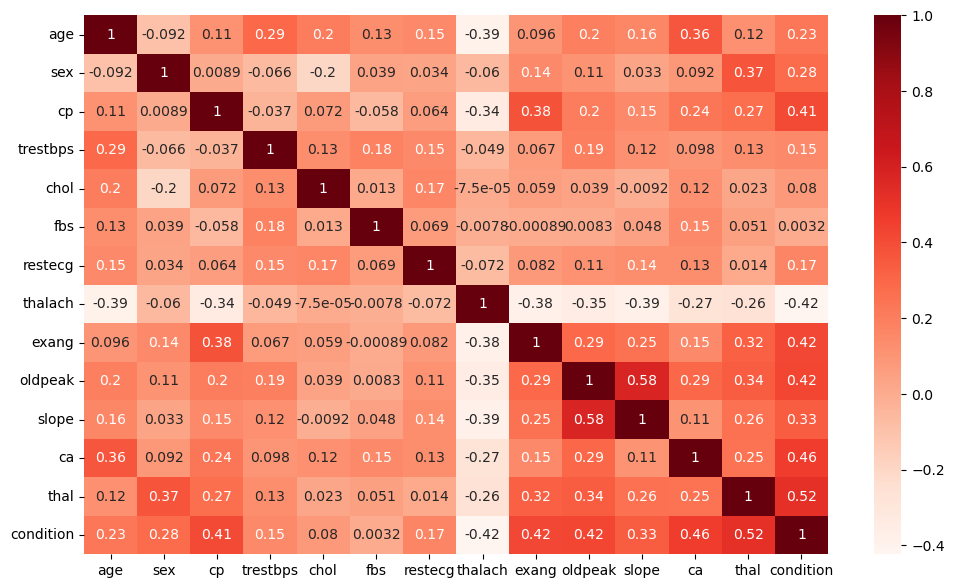

In [84]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='Reds')
plt.show()

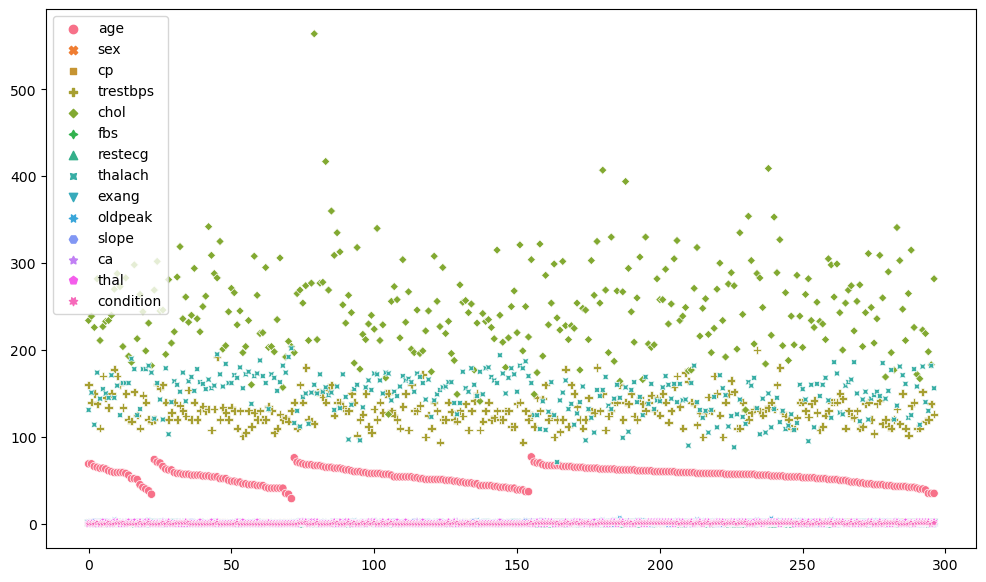

In [85]:
plt.figure(figsize=(12,7))
sns.scatterplot( data=df)
plt.show()


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [87]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [88]:
df.condition.value_counts()

0    160
1    137
Name: condition, dtype: int64

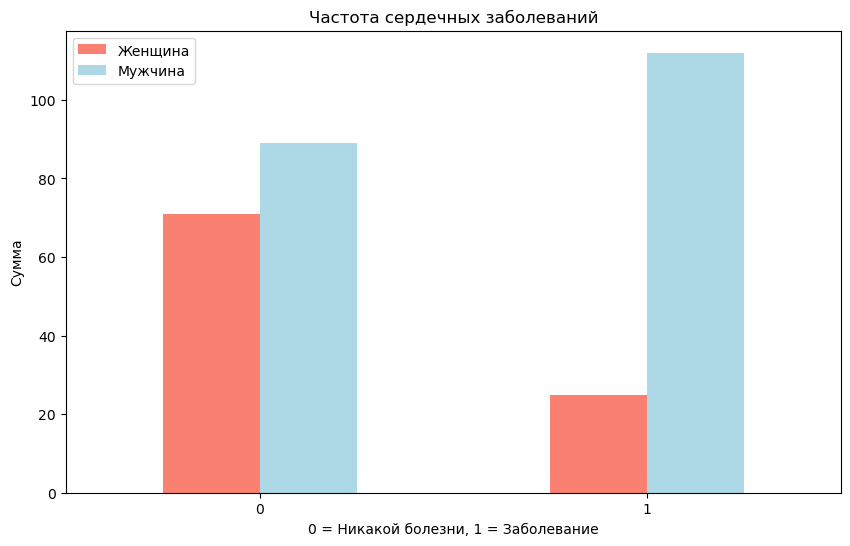

In [89]:
pd.crosstab(df.condition, df.sex).plot(kind = "bar",
                                    figsize = (10, 6),
                                    color = ["salmon", "lightblue"]);

plt.title("Частота сердечных заболеваний");
plt.ylabel("Сумма");
plt.xlabel("0 = Никакой болезни, 1 = Заболевание");
plt.legend(["Женщина", "Mужчина"]);
plt.xticks(rotation = 0);

<AxesSubplot:ylabel='Frequency'>

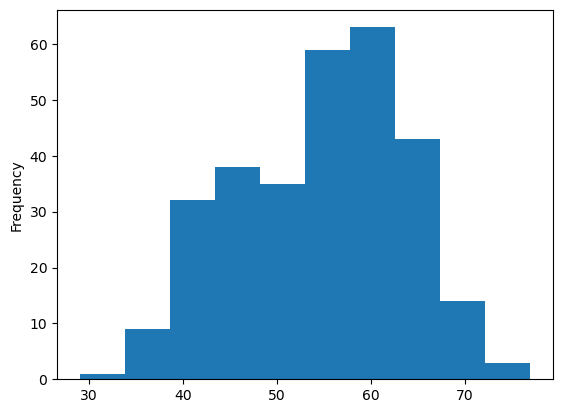

In [90]:
df.age.plot.hist()

<AxesSubplot:xlabel='thalach', ylabel='oldpeak'>

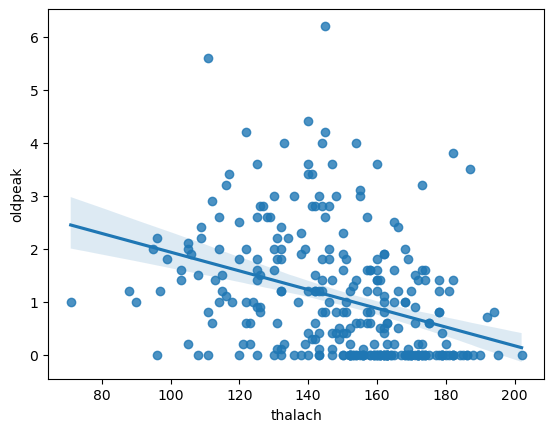

In [91]:
sns.regplot(x = "thalach", y = "oldpeak", data = df)

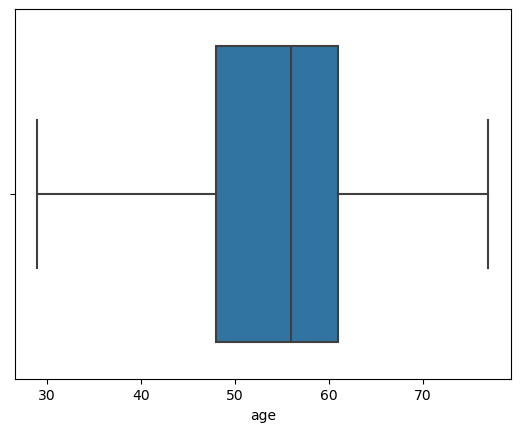

In [92]:
sns.boxplot(x='age', data=df)
plt.show()


In [93]:

from sklearn.preprocessing import StandardScaler
x = df.drop('condition', axis=1)
y = df['condition']

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=4, shuffle=True)

In [95]:
sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.transform(x_test)


## K-NN model

In [96]:


knn_classifier = KNeighborsClassifier(n_neighbors=22)
knn_classifier.fit(x_train_std, y_train)



KNeighborsClassifier(n_neighbors=22)

In [97]:
y_pred_knn = knn_classifier.predict(x_test_std)

In [98]:
knn_cm = confusion_matrix(y_test, y_pred_knn)
print(knn_cm)
knn_acc = accuracy_score(y_test, y_pred_knn)
print(knn_acc)

[[31  2]
 [ 8 19]]
0.8333333333333334


In [99]:
print("Accuracy on training set: {:.3f}".format(knn_classifier.score(x_train_std, y_train)))
print("Accuracy on testing set: {:.3f}".format(knn_classifier.score(x_test_std, y_test)))

Accuracy on training set: 0.848
Accuracy on testing set: 0.833


In [100]:


knn_test = knn_classifier.score(x_test_std, y_test)


scores = []
for k in range(1,30):
    knn = KNeighborsClassifier(k).fit(x_train_std, y_train)
    scores.append(knn.score(x_train_std, y_train))

print(scores, end = " ")




[1.0, 0.869198312236287, 0.8860759493670886, 0.890295358649789, 0.8607594936708861, 0.8438818565400844, 0.8481012658227848, 0.8481012658227848, 0.8481012658227848, 0.8523206751054853, 0.8523206751054853, 0.8523206751054853, 0.8607594936708861, 0.8607594936708861, 0.8607594936708861, 0.8565400843881856, 0.8565400843881856, 0.8438818565400844, 0.8607594936708861, 0.8565400843881856, 0.8481012658227848, 0.8481012658227848, 0.8523206751054853, 0.8438818565400844, 0.8523206751054853, 0.8438818565400844, 0.8438818565400844, 0.8438818565400844, 0.8481012658227848] 

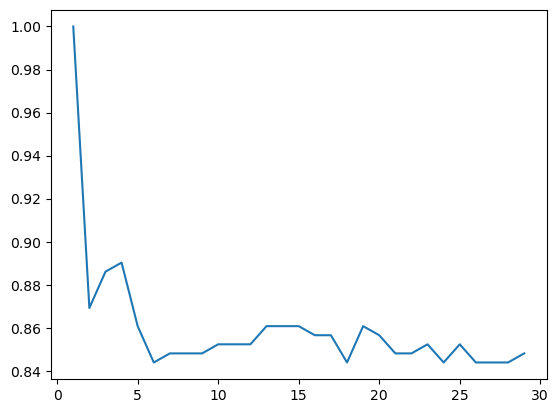

In [101]:
plt.plot(np.arange(1,30), scores)

In [102]:
print(accuracy_score(y_pred_knn,y_test))
print(f1_score(y_pred_knn,y_test,average='weighted'))
print(classification_report(y_pred_knn,y_test))

0.8333333333333334
0.8368055555555556
              precision    recall  f1-score   support

           0       0.94      0.79      0.86        39
           1       0.70      0.90      0.79        21

    accuracy                           0.83        60
   macro avg       0.82      0.85      0.83        60
weighted avg       0.86      0.83      0.84        60



In [103]:
 
def check_results_of_classification(model_name,model,y_pred,y_test):
    print(model_name)
    print("Accuracy:", accuracy_score(y_test,y_pred))
    print("Precision:", precision_score(y_test, y_pred, ))
    print("Recall:", recall_score(y_test,y_pred))
    print("F1 Score:", f1_score(y_test,y_pred))
    model_roc_auc = roc_auc_score(y_test, model.predict(x_test_std))

    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test_std)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % model_roc_auc)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim(([0.0, 1.0]))
    plt.ylim(([0.0, 1.05]))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.show()
    
     
    


## Logistic Regression

In [104]:
model_logistic = LogisticRegression(max_iter = 1000)
model_logistic.fit(x_train_std, y_train)

LogisticRegression(max_iter=1000)

In [105]:
y_pred_logreg = model_logistic.predict(x_test_std)

Logistic Regression
Accuracy: 0.8166666666666667
Precision: 0.8636363636363636
Recall: 0.7037037037037037
F1 Score: 0.7755102040816326


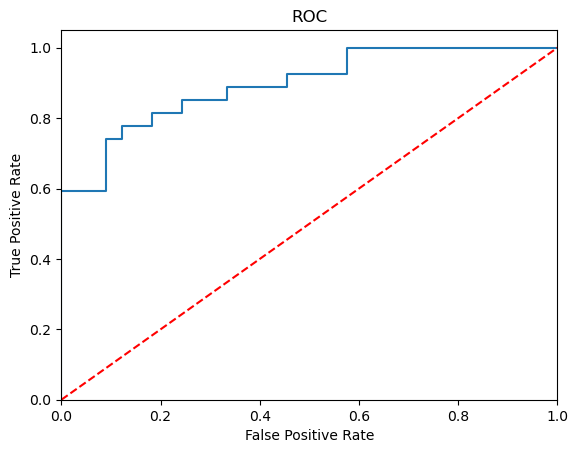

In [106]:
check_results_of_classification('Logistic Regression',model_logistic,y_pred_logreg,y_test)

## Tuning the Parameters with Grid Search

In [107]:
grid={"C":[0.1, 1, 100, 300, 500],"max_iter": [1250,1500,2000]} # l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(x_train_std,y_train)
 

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 100, 300, 500],
                         'max_iter': [1250, 1500, 2000]})

In [108]:
print("Tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("Accuracy :",logreg_cv.best_score_)

Tuned hpyerparameters :(best parameters)  {'C': 0.1, 'max_iter': 1250}
Accuracy : 0.834963768115942


In [109]:
logreg=LogisticRegression(C= 0.1, max_iter= 1250)
logreg.fit(x_train_std, y_train)
y_pred_logreg_tuned = logreg.predict(x_test_std)

Logistic Regression Tuned
Accuracy: 0.8166666666666667
Precision: 0.8636363636363636
Recall: 0.7037037037037037
F1 Score: 0.7755102040816326


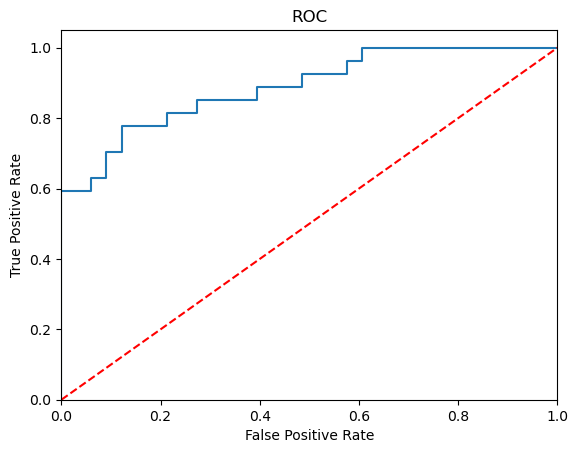

In [110]:
check_results_of_classification('Logistic Regression Tuned',logreg,y_pred_logreg_tuned,y_test)

## KNN

In [111]:

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_std, y_train)
y_pred = knn.predict(x_test_std)
y_pred



array([1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0])

KNN
Accuracy: 0.85
Precision: 0.875
Recall: 0.7777777777777778
F1 Score: 0.823529411764706


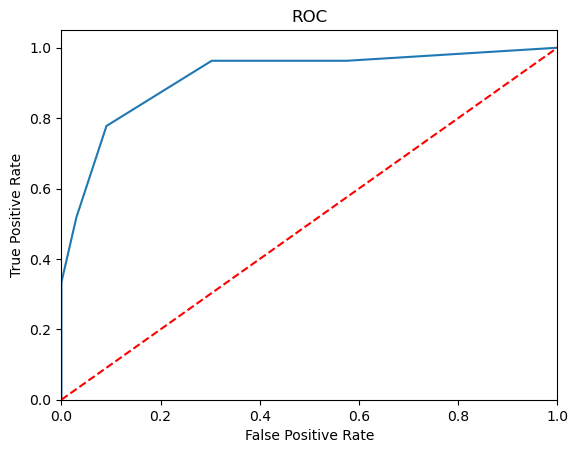

In [112]:
check_results_of_classification('KNN',knn,y_pred,y_test)

## Tuning the Parameters with Grid Search

In [113]:
knn_tuning = KNeighborsClassifier()

param_grid = {'n_neighbors': np.arange(1, 50),"metric": ["minkowski","manhattan"]}
knn_gs = GridSearchCV(knn_tuning, param_grid, cv=5)
knn_gs.fit(x_train_std,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [114]:
print("best parameter:",knn_gs.best_params_)
print("The mean accuracy of the scores:",knn_gs.best_score_)

best parameter: {'metric': 'minkowski', 'n_neighbors': 37}
The mean accuracy of the scores: 0.852659574468085


In [115]:
knn_tuning = KNeighborsClassifier(metric='minkowski',n_neighbors=37)

KNN Tuned
Accuracy: 0.8166666666666667
Precision: 0.8636363636363636
Recall: 0.7037037037037037
F1 Score: 0.7755102040816326


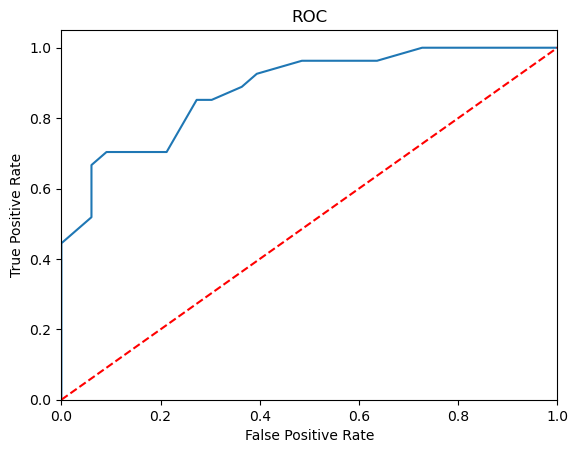

In [116]:
knn_tuning.fit(x_train_std, y_train)
y_pred = knn_tuning.predict(x_test_std)
check_results_of_classification('KNN Tuned',knn_tuning,y_pred,y_test)


## Support Vector Machine

SVM
Accuracy: 0.8166666666666667
Precision: 0.8636363636363636
Recall: 0.7037037037037037
F1 Score: 0.7755102040816326


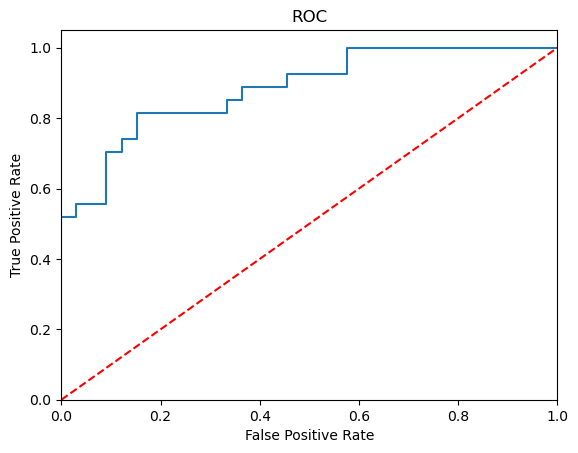

In [117]:
svm_model_linear = SVC(kernel='linear', C=1,probability=True).fit(x_train_std, y_train)
y_pred = svm_model_linear.predict(x_test_std)
check_results_of_classification('SVM',svm_model_linear,y_pred,y_test) 

## Tuning the Parameters with Grid Search

In [118]:
svc_tuning = SVC()
param_grid = {'C':[0.1,1,10,100], 'kernel':['linear','rbf',"poly"]}
svc_gs = GridSearchCV(svc_tuning, param_grid, cv=5)
svc_gs.fit(x_train_std,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'poly']})

In [119]:


print("best parameter:",svc_gs.best_params_)
print("The mean accuracy of the scores:",svc_gs.best_score_)



best parameter: {'C': 0.1, 'kernel': 'rbf'}
The mean accuracy of the scores: 0.8442375886524823


SVM
Accuracy: 0.8166666666666667
Precision: 0.8636363636363636
Recall: 0.7037037037037037
F1 Score: 0.7755102040816326


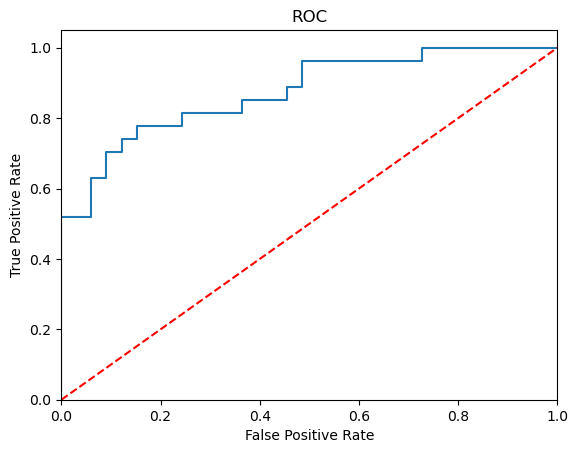

In [120]:
svm_model_linear = SVC(kernel='rbf', C=0.1,probability=True).fit(x_train_std, y_train)
y_pred = svm_model_linear.predict(x_test_std)
check_results_of_classification('SVM',svm_model_linear,y_pred,y_test) 

## Decision Trees - XGBOOST

In [121]:
dtrain = xgb.DMatrix(x_train_std, label=y_train)
dtest = xgb.DMatrix(x_test_std, label=y_test)

In [122]:
param = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 3}  # the number of classes that exist in this datset

num_round = 20  # the number of training iterations

In [123]:
bst = xgb.train(param, dtrain, num_round)
preds = bst.predict(dtest)

[17:48:10] WARNING: ../src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




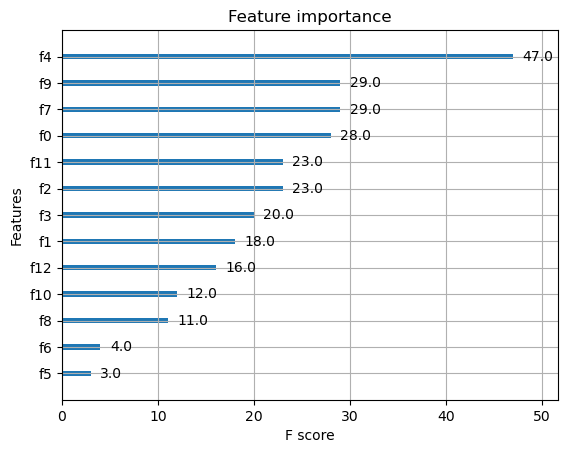

In [124]:
xgb.plot_importance(bst)
plt.show()

## Random Forest

In [125]:
clf=RandomForestClassifier(n_estimators=100)

clf.fit(x_train_std,y_train)

y_pred=clf.predict(x_test_std)

SVM
Accuracy: 0.8166666666666667
Precision: 0.8636363636363636
Recall: 0.7037037037037037
F1 Score: 0.7755102040816326


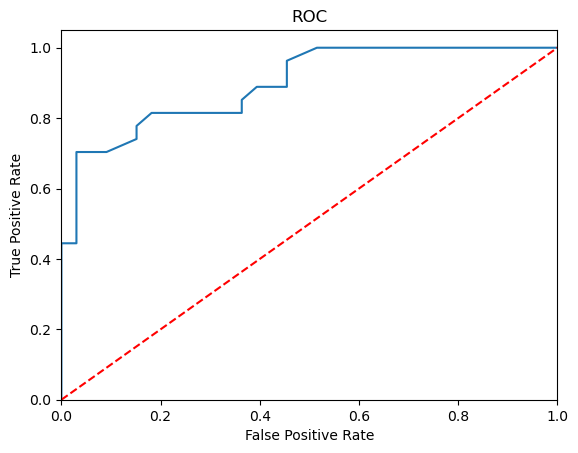

In [126]:
check_results_of_classification('SVM',clf,y_pred,y_test) 

## Tuning the Parameters with Grid Search

In [127]:
rf = RandomForestClassifier()
rf_params = {"n_estimators":[100,500,1000],
            "min_samples_split":[2,5,10]}
rf_cv_model = GridSearchCV(rf,rf_params,cv=10).fit(x_train_std,y_train)

In [128]:


print(rf_cv_model.best_params_)
print(svc_gs.best_score_)



{'min_samples_split': 10, 'n_estimators': 500}
0.8442375886524823


RandomForestClassifier Tuned
Accuracy: 0.8166666666666667
Precision: 0.8636363636363636
Recall: 0.7037037037037037
F1 Score: 0.7755102040816326


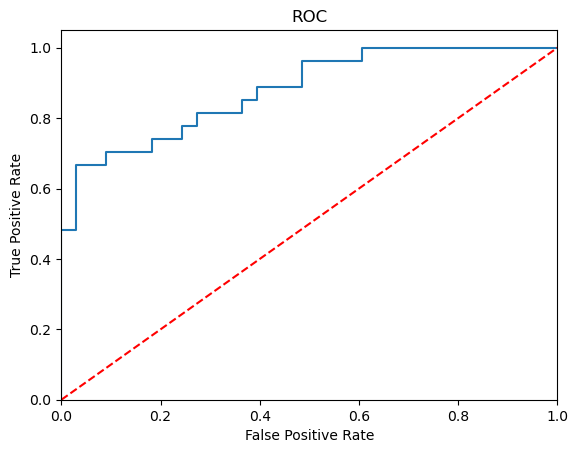

In [129]:
clf=RandomForestClassifier(n_estimators=100,min_samples_split=10)

clf.fit(x_train_std,y_train)

y_pred=clf.predict(x_test_std)
check_results_of_classification('RandomForestClassifier Tuned',clf,y_pred,y_test) 

## DecisionTreeClassifier

DecisionTreeClassifier 
Accuracy: 0.7333333333333333
Precision: 0.6774193548387096
Recall: 0.7777777777777778
F1 Score: 0.7241379310344828


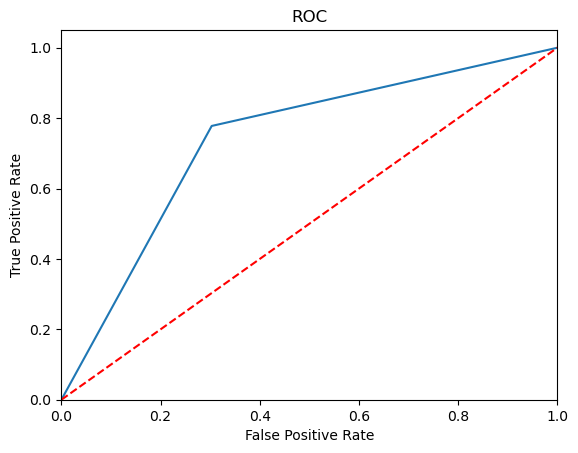

In [130]:
dt=DecisionTreeClassifier()
dt.fit(x_train_std,y_train)
y_pred=dt.predict(x_test_std)
check_results_of_classification('DecisionTreeClassifier ',dt,y_pred,y_test) 

## Finding the Best Model

In [131]:
models = [clf,
           svm_model_linear,
           knn,
           logreg,dt]
result = []
results = pd.DataFrame(columns = ["Models","Accuracy"])
for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(x_test_std)
    acc = accuracy_score(y_test,y_pred)
    result = pd.DataFrame([[names,acc*100]],columns = ["Models","Accuracy"])
    results = results.append(result)

In [132]:
results

,Models,Accuracy
0,RandomForestClassifier,81.666667
0,SVC,81.666667
0,KNeighborsClassifier,85.000000
0,LogisticRegression,81.666667
0,DecisionTreeClassifier,73.333333


## After Tuning

In [133]:
X = df.drop("condition",axis=1) # the independent variable
y = df["condition"] # the dependent variable
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 42) # % 70 train, %30 test
sc = StandardScaler()
x_train_std = sc.fit_transform(X_train)
x_test_std = sc.transform(X_test)
svm_model_tuned = SVC(C = 0.1, kernel = 'linear').fit(x_train_std, y_train)
clf_tuned = RandomForestClassifier(min_samples_split = 10, n_estimators = 100).fit(x_train_std,y_train)
knn_tuned = KNeighborsClassifier(n_neighbors = 18, metric='manhattan').fit(x_train_std, y_train)
model_logistic_tuned = LogisticRegression(C = 0.1, max_iter = 1250).fit(x_train_std, y_train)


In [134]:
models = [clf_tuned,
          svm_model_tuned,
          knn_tuned,
          model_logistic_tuned,dt]
result2 = []
results2 = pd.DataFrame(columns = ["Models","Accuracy"])
for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(x_test_std)
    acc = model.score(x_test_std,y_test)
    result2 = pd.DataFrame([[names,acc*100]],columns = ["Models","Accuracy"])
    results2= results.append(result)
results

,Models,Accuracy
0,RandomForestClassifier,81.666667
0,SVC,81.666667
0,KNeighborsClassifier,85.000000
0,LogisticRegression,81.666667
0,DecisionTreeClassifier,73.333333


In [135]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, KFold
xgbc = XGBClassifier()
xgbc.fit(x_train_std,y_train)
scores = cross_val_score(xgbc, x_train_std, y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbc, x_train_std, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

y_pred = xgbc.predict(x_test_std)
cm = confusion_matrix(y_test,y_pred)
print(cm)

Mean cross-validation score: 0.79
K-fold CV average score: 0.81
[[39  9]
 [ 8 34]]


XGBoost 
Accuracy: 0.8111111111111111
Precision: 0.7906976744186046
Recall: 0.8095238095238095
F1 Score: 0.8


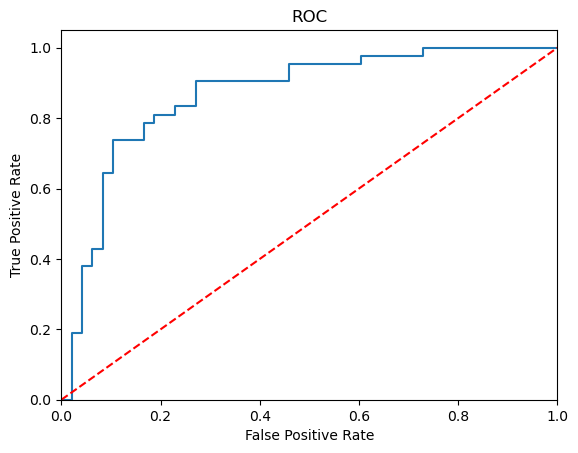

In [136]:
check_results_of_classification('XGBoost ',xgbc,y_pred,y_test) 

In [137]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

In [138]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [139]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 4,
    cv = 4,
    verbose=True
)

In [140]:
grid_search.fit(x_train_std, y_train)

34:	learn: 0.5062440	total: 635ms	remaining: 635ms
35:	learn: 0.5035532	total: 658ms	remaining: 621ms
36:	learn: 0.5003969	total: 659ms	remaining: 587ms
37:	learn: 0.4980171	total: 707ms	remaining: 595ms
38:	learn: 0.4946282	total: 709ms	remaining: 564ms
39:	learn: 0.4887572	total: 713ms	remaining: 534ms
40:	learn: 0.4832383	total: 713ms	remaining: 505ms
41:	learn: 0.4803290	total: 715ms	remaining: 477ms
42:	learn: 0.4778313	total: 779ms	remaining: 489ms
43:	learn: 0.4750937	total: 782ms	remaining: 462ms
44:	learn: 0.4699660	total: 783ms	remaining: 435ms
45:	learn: 0.4668881	total: 784ms	remaining: 409ms
46:	learn: 0.4618827	total: 785ms	remaining: 384ms
47:	learn: 0.4577294	total: 786ms	remaining: 360ms
48:	learn: 0.4533727	total: 786ms	remaining: 337ms
49:	learn: 0.4501930	total: 787ms	remaining: 315ms
50:	learn: 0.4480140	total: 807ms	remaining: 301ms
51:	learn: 0.4453934	total: 852ms	remaining: 295ms
52:	learn: 0.4428922	total: 855ms	remaining: 274ms
53:	learn: 0.4409229	total: 896

Fitting 4 folds for each of 96 candidates, totalling 384 fits


/home/maxim/.local/lib/python3.10/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 1.16.0-unknown is an invalid version and will not be supported in a future release
  warnings.warn(
/home/maxim/.local/lib/python3.10/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/maxim/.local/lib/python3.10/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/maxim/.local/lib/python3.10/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 1.16.0-unknown is an invalid version and will not be supported in a future release
  warnings.warn(
/home/maxim/.local/lib/python3.10/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                  

In [141]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=4, nthread=4, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, ...)

In [142]:
xgbc_tuned = XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
                monotone_constraints='()', n_estimators=100,
              n_jobs=4, nthread=4, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0 )
xgbc_tuned.fit(x_train_std,y_train)
scores = cross_val_score(xgbc_tuned, x_train_std, y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbc_tuned, x_train_std, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

ypred = xgbc_tuned.predict(x_test_std)
cm = confusion_matrix(y_test,ypred)
print(cm)

Mean cross-validation score: 0.83
K-fold CV average score: 0.81
[[40  8]
 [ 8 34]]


XGBoost Tuned 
Accuracy: 0.8111111111111111
Precision: 0.7906976744186046
Recall: 0.8095238095238095
F1 Score: 0.8


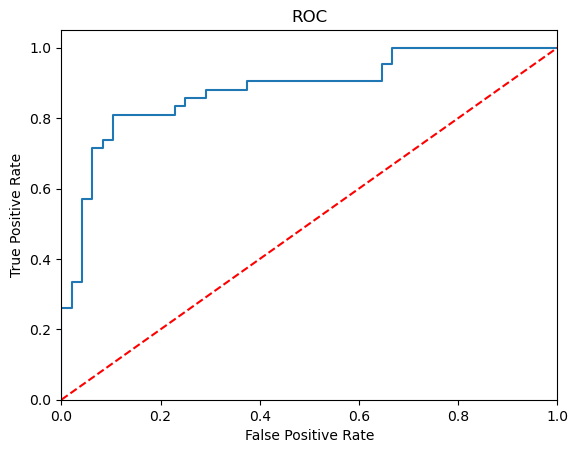

In [143]:
check_results_of_classification('XGBoost Tuned ',xgbc_tuned,y_pred,y_test) 

In [144]:
import catboost as ctb

Learning rate set to 0.005258
0:	learn: 0.6884922	total: 1.75ms	remaining: 1.75s
1:	learn: 0.6841712	total: 2.41ms	remaining: 1.2s
2:	learn: 0.6809120	total: 2.9ms	remaining: 964ms
3:	learn: 0.6770142	total: 3.32ms	remaining: 827ms
4:	learn: 0.6728324	total: 3.75ms	remaining: 747ms
5:	learn: 0.6691380	total: 4.24ms	remaining: 702ms
6:	learn: 0.6671521	total: 4.53ms	remaining: 643ms
7:	learn: 0.6635241	total: 5ms	remaining: 620ms
8:	learn: 0.6598188	total: 5.48ms	remaining: 604ms
9:	learn: 0.6566834	total: 6.16ms	remaining: 609ms
10:	learn: 0.6530113	total: 6.8ms	remaining: 611ms
11:	learn: 0.6490882	total: 7.35ms	remaining: 605ms
12:	learn: 0.6458068	total: 7.78ms	remaining: 591ms
13:	learn: 0.6429354	total: 8.29ms	remaining: 584ms
14:	learn: 0.6392537	total: 8.73ms	remaining: 573ms
15:	learn: 0.6380158	total: 8.96ms	remaining: 551ms
16:	learn: 0.6348966	total: 9.41ms	remaining: 544ms
17:	learn: 0.6320235	total: 9.91ms	remaining: 541ms
18:	learn: 0.6288879	total: 10.3ms	remaining: 534m

169:	learn: 0.3513782	total: 80.5ms	remaining: 393ms
170:	learn: 0.3502321	total: 81.2ms	remaining: 394ms
171:	learn: 0.3491897	total: 81.7ms	remaining: 393ms
172:	learn: 0.3480969	total: 83ms	remaining: 397ms
173:	learn: 0.3468845	total: 83.5ms	remaining: 397ms
174:	learn: 0.3461394	total: 84.1ms	remaining: 397ms
175:	learn: 0.3449159	total: 84.6ms	remaining: 396ms
176:	learn: 0.3438531	total: 85.1ms	remaining: 396ms
177:	learn: 0.3427677	total: 85.5ms	remaining: 395ms
178:	learn: 0.3414948	total: 86.2ms	remaining: 395ms
179:	learn: 0.3402966	total: 86.7ms	remaining: 395ms
180:	learn: 0.3395430	total: 87.2ms	remaining: 395ms
181:	learn: 0.3386314	total: 87.8ms	remaining: 395ms
182:	learn: 0.3377186	total: 88.4ms	remaining: 395ms
183:	learn: 0.3369828	total: 88.9ms	remaining: 394ms
184:	learn: 0.3360324	total: 89.5ms	remaining: 394ms
185:	learn: 0.3351684	total: 90.1ms	remaining: 394ms
186:	learn: 0.3342880	total: 90.6ms	remaining: 394ms
187:	learn: 0.3329973	total: 91ms	remaining: 393

398:	learn: 0.2131832	total: 185ms	remaining: 278ms
399:	learn: 0.2130809	total: 185ms	remaining: 278ms
400:	learn: 0.2127433	total: 186ms	remaining: 277ms
401:	learn: 0.2122426	total: 186ms	remaining: 277ms
402:	learn: 0.2118828	total: 187ms	remaining: 277ms
403:	learn: 0.2116377	total: 187ms	remaining: 276ms
404:	learn: 0.2111891	total: 188ms	remaining: 276ms
405:	learn: 0.2107733	total: 188ms	remaining: 275ms
406:	learn: 0.2104219	total: 189ms	remaining: 275ms
407:	learn: 0.2101085	total: 189ms	remaining: 274ms
408:	learn: 0.2097495	total: 190ms	remaining: 274ms
409:	learn: 0.2094135	total: 190ms	remaining: 273ms
410:	learn: 0.2090467	total: 190ms	remaining: 273ms
411:	learn: 0.2085330	total: 191ms	remaining: 273ms
412:	learn: 0.2081902	total: 191ms	remaining: 272ms
413:	learn: 0.2078522	total: 192ms	remaining: 272ms
414:	learn: 0.2074672	total: 192ms	remaining: 271ms
415:	learn: 0.2070578	total: 193ms	remaining: 271ms
416:	learn: 0.2065544	total: 193ms	remaining: 270ms
417:	learn: 

556:	learn: 0.1653592	total: 257ms	remaining: 205ms
557:	learn: 0.1650311	total: 258ms	remaining: 205ms
558:	learn: 0.1648175	total: 259ms	remaining: 205ms
559:	learn: 0.1645728	total: 260ms	remaining: 204ms
560:	learn: 0.1643949	total: 260ms	remaining: 204ms
561:	learn: 0.1639788	total: 261ms	remaining: 203ms
562:	learn: 0.1636413	total: 261ms	remaining: 203ms
563:	learn: 0.1634259	total: 262ms	remaining: 202ms
564:	learn: 0.1632855	total: 262ms	remaining: 202ms
565:	learn: 0.1630999	total: 262ms	remaining: 201ms
566:	learn: 0.1629162	total: 263ms	remaining: 201ms
567:	learn: 0.1625759	total: 263ms	remaining: 200ms
568:	learn: 0.1622760	total: 264ms	remaining: 200ms
569:	learn: 0.1620638	total: 264ms	remaining: 199ms
570:	learn: 0.1618165	total: 265ms	remaining: 199ms
571:	learn: 0.1614945	total: 265ms	remaining: 198ms
572:	learn: 0.1613248	total: 266ms	remaining: 198ms
573:	learn: 0.1611095	total: 267ms	remaining: 198ms
574:	learn: 0.1607624	total: 268ms	remaining: 198ms
575:	learn: 

804:	learn: 0.1171261	total: 370ms	remaining: 89.7ms
805:	learn: 0.1170155	total: 371ms	remaining: 89.3ms
806:	learn: 0.1168505	total: 371ms	remaining: 88.8ms
807:	learn: 0.1166481	total: 372ms	remaining: 88.4ms
808:	learn: 0.1165253	total: 372ms	remaining: 87.9ms
809:	learn: 0.1162964	total: 373ms	remaining: 87.5ms
810:	learn: 0.1161322	total: 373ms	remaining: 87ms
811:	learn: 0.1159062	total: 374ms	remaining: 86.6ms
812:	learn: 0.1156722	total: 374ms	remaining: 86.1ms
813:	learn: 0.1155354	total: 375ms	remaining: 85.7ms
814:	learn: 0.1153932	total: 375ms	remaining: 85.2ms
815:	learn: 0.1152977	total: 376ms	remaining: 84.7ms
816:	learn: 0.1151616	total: 376ms	remaining: 84.3ms
817:	learn: 0.1149724	total: 377ms	remaining: 83.8ms
818:	learn: 0.1147841	total: 377ms	remaining: 83.4ms
819:	learn: 0.1146528	total: 378ms	remaining: 82.9ms
820:	learn: 0.1144087	total: 378ms	remaining: 82.4ms
821:	learn: 0.1143150	total: 379ms	remaining: 82ms
822:	learn: 0.1141042	total: 379ms	remaining: 81.5

964:	learn: 0.0956079	total: 444ms	remaining: 16.1ms
965:	learn: 0.0955041	total: 445ms	remaining: 15.7ms
966:	learn: 0.0954042	total: 446ms	remaining: 15.2ms
967:	learn: 0.0952515	total: 446ms	remaining: 14.7ms
968:	learn: 0.0950863	total: 447ms	remaining: 14.3ms
969:	learn: 0.0949995	total: 447ms	remaining: 13.8ms
970:	learn: 0.0949222	total: 447ms	remaining: 13.4ms
971:	learn: 0.0948798	total: 448ms	remaining: 12.9ms
972:	learn: 0.0947703	total: 448ms	remaining: 12.4ms
973:	learn: 0.0947059	total: 449ms	remaining: 12ms
974:	learn: 0.0945716	total: 449ms	remaining: 11.5ms
975:	learn: 0.0944026	total: 450ms	remaining: 11.1ms
976:	learn: 0.0942636	total: 450ms	remaining: 10.6ms
977:	learn: 0.0941513	total: 451ms	remaining: 10.1ms
978:	learn: 0.0939541	total: 451ms	remaining: 9.68ms
979:	learn: 0.0938999	total: 452ms	remaining: 9.22ms
980:	learn: 0.0937797	total: 453ms	remaining: 8.76ms
981:	learn: 0.0937082	total: 453ms	remaining: 8.31ms
982:	learn: 0.0936253	total: 454ms	remaining: 7.

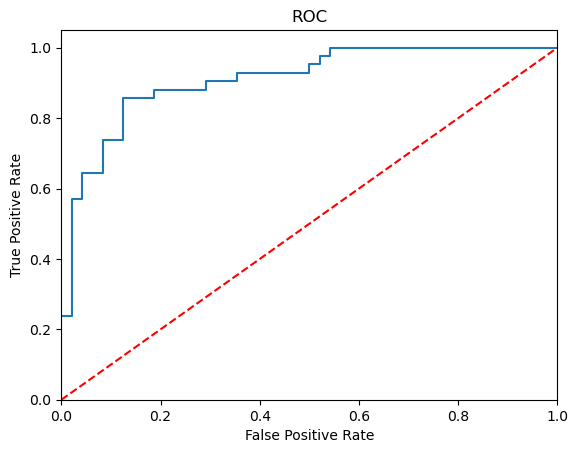

In [145]:
model_CBC = ctb.CatBoostClassifier()
model_CBC.fit(x_train_std,y_train)
y_pred = model_CBC.predict(x_test_std)
check_results_of_classification('CatBoost  ',model_CBC,y_pred,y_test) 

## Tuning CatBoost

In [146]:
from catboost import CatBoostClassifier
CBC = CatBoostClassifier()
parameters = {'depth'         : [4,5,6,7,8,9, 10],
                 'learning_rate' : [0.01,0.02,0.03,0.04],
                  'iterations'    : [10, 20,30,40,50,60,70,80,90, 100]
                 }

In [147]:
Grid_CBC = GridSearchCV(estimator=CBC, param_grid = parameters, cv = 2, n_jobs=-1)
Grid_CBC.fit(x_train_std,y_train)

/home/maxim/.local/lib/python3.10/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 1.16.0-unknown is an invalid version and will not be supported in a future release
  warnings.warn(
/home/maxim/.local/lib/python3.10/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/maxim/.local/lib/python3.10/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/maxim/.local/lib/python3.10/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 1.16.0-unknown is an invalid version and will not be supported in a future release
  warnings.warn(
/home/maxim/.local/lib/python3.10/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be

0:	learn: 0.6891996	total: 48.7ms	remaining: 438ms
1:	learn: 0.6853440	total: 49.6ms	remaining: 198ms
2:	learn: 0.6819853	total: 49.8ms	remaining: 116ms
3:	learn: 0.6786594	total: 50ms	remaining: 75.1ms
4:	learn: 0.6752250	total: 50.3ms	remaining: 50.3ms
5:	learn: 0.6722904	total: 50.5ms	remaining: 33.7ms
6:	learn: 0.6680536	total: 50.7ms	remaining: 21.7ms
7:	learn: 0.6651499	total: 51ms	remaining: 12.7ms
8:	learn: 0.6618074	total: 51.2ms	remaining: 5.69ms
9:	learn: 0.6567623	total: 51.4ms	remaining: 0us
0:	learn: 0.6872379	total: 459us	remaining: 8.73ms
1:	learn: 0.6815134	total: 812us	remaining: 7.32ms
2:	learn: 0.6765576	total: 12.1ms	remaining: 68.3ms
3:	learn: 0.6716660	total: 12.3ms	remaining: 49.3ms
4:	learn: 0.6675214	total: 12.6ms	remaining: 37.8ms
5:	learn: 0.6632443	total: 12.8ms	remaining: 29.8ms
6:	learn: 0.6571075	total: 13.1ms	remaining: 24.2ms
7:	learn: 0.6529135	total: 15.7ms	remaining: 23.5ms
8:	learn: 0.6481401	total: 16ms	remaining: 19.5ms
9:	learn: 0.6409493	total:

0:	learn: 0.6882194	total: 53.8ms	remaining: 485ms
1:	learn: 0.6833641	total: 54.6ms	remaining: 218ms
2:	learn: 0.6783436	total: 54.8ms	remaining: 128ms
3:	learn: 0.6732428	total: 54.9ms	remaining: 82.4ms
4:	learn: 0.6674393	total: 55.1ms	remaining: 55.1ms
5:	learn: 0.6634180	total: 55.3ms	remaining: 36.9ms
6:	learn: 0.6575925	total: 55.5ms	remaining: 23.8ms
7:	learn: 0.6533097	total: 55.6ms	remaining: 13.9ms
8:	learn: 0.6501375	total: 55.7ms	remaining: 6.19ms
9:	learn: 0.6458165	total: 55.9ms	remaining: 0us
0:	learn: 0.6857763	total: 382us	remaining: 7.26ms
1:	learn: 0.6785879	total: 578us	remaining: 5.2ms
2:	learn: 0.6712152	total: 758us	remaining: 4.3ms
3:	learn: 0.6637723	total: 941us	remaining: 3.77ms
4:	learn: 0.6553998	total: 1.12ms	remaining: 3.37ms
5:	learn: 0.6479020	total: 1.3ms	remaining: 3.04ms
6:	learn: 0.6396787	total: 1.48ms	remaining: 2.74ms
7:	learn: 0.6336151	total: 1.98ms	remaining: 2.97ms
8:	learn: 0.6292641	total: 2.18ms	remaining: 2.66ms
9:	learn: 0.6233343	total

0:	learn: 0.6906769	total: 46.9ms	remaining: 422ms
1:	learn: 0.6882175	total: 47.1ms	remaining: 188ms
2:	learn: 0.6856525	total: 47.3ms	remaining: 110ms
3:	learn: 0.6826382	total: 47.5ms	remaining: 71.3ms
4:	learn: 0.6796267	total: 47.7ms	remaining: 47.7ms
5:	learn: 0.6775437	total: 48ms	remaining: 32ms
6:	learn: 0.6744722	total: 48.2ms	remaining: 20.7ms
7:	learn: 0.6722078	total: 48.4ms	remaining: 12.1ms
8:	learn: 0.6704977	total: 48.6ms	remaining: 5.4ms
9:	learn: 0.6681645	total: 48.9ms	remaining: 0us
0:	learn: 0.6906769	total: 417us	remaining: 12.1ms
1:	learn: 0.6882175	total: 28.1ms	remaining: 394ms
2:	learn: 0.6856525	total: 28.3ms	remaining: 255ms
3:	learn: 0.6826382	total: 28.6ms	remaining: 186ms
4:	learn: 0.6796267	total: 28.8ms	remaining: 144ms
5:	learn: 0.6775437	total: 28.9ms	remaining: 116ms
6:	learn: 0.6744722	total: 29.1ms	remaining: 95.6ms
7:	learn: 0.6722078	total: 29.3ms	remaining: 80.5ms
8:	learn: 0.6704977	total: 29.4ms	remaining: 68.7ms
9:	learn: 0.6681645	total: 29

66:	learn: 0.5111332	total: 26.8ms	remaining: 1.2ms
67:	learn: 0.5094290	total: 27ms	remaining: 793us
68:	learn: 0.5072396	total: 27.2ms	remaining: 393us
69:	learn: 0.5052018	total: 27.3ms	remaining: 0us
0:	learn: 0.6872379	total: 244us	remaining: 19.3ms
1:	learn: 0.6815134	total: 432us	remaining: 16.9ms
2:	learn: 0.6765576	total: 565us	remaining: 14.5ms
3:	learn: 0.6716660	total: 746us	remaining: 14.2ms
4:	learn: 0.6675214	total: 930us	remaining: 14ms
5:	learn: 0.6632443	total: 1.06ms	remaining: 13.1ms
6:	learn: 0.6571075	total: 1.24ms	remaining: 12.9ms
7:	learn: 0.6529135	total: 1.42ms	remaining: 12.8ms
8:	learn: 0.6481401	total: 1.6ms	remaining: 12.6ms
9:	learn: 0.6409493	total: 1.79ms	remaining: 12.5ms
10:	learn: 0.6371283	total: 1.91ms	remaining: 12ms
11:	learn: 0.6320953	total: 2.09ms	remaining: 11.9ms
12:	learn: 0.6288456	total: 2.27ms	remaining: 11.7ms
13:	learn: 0.6248526	total: 2.45ms	remaining: 11.6ms
14:	learn: 0.6185731	total: 2.63ms	remaining: 11.4ms
15:	learn: 0.6139584	

37:	learn: 0.4566334	total: 6.27ms	remaining: 329us
38:	learn: 0.4527849	total: 6.42ms	remaining: 164us
39:	learn: 0.4502695	total: 6.58ms	remaining: 0us
0:	learn: 0.6911697	total: 204us	remaining: 14.1ms
1:	learn: 0.6892210	total: 327us	remaining: 11.1ms
2:	learn: 0.6875151	total: 473us	remaining: 10.6ms
3:	learn: 0.6858184	total: 609us	remaining: 10.1ms
4:	learn: 0.6840523	total: 882us	remaining: 11.5ms
5:	learn: 0.6819067	total: 1.02ms	remaining: 10.9ms
6:	learn: 0.6799461	total: 1.15ms	remaining: 10.4ms
7:	learn: 0.6784005	total: 1.27ms	remaining: 9.88ms
8:	learn: 0.6765673	total: 1.4ms	remaining: 9.46ms
9:	learn: 0.6747591	total: 1.54ms	remaining: 9.23ms
10:	learn: 0.6732659	total: 1.67ms	remaining: 8.97ms
11:	learn: 0.6712099	total: 1.81ms	remaining: 8.76ms
12:	learn: 0.6694166	total: 1.93ms	remaining: 8.45ms
13:	learn: 0.6677949	total: 5.56ms	remaining: 22.3ms
14:	learn: 0.6658977	total: 6.21ms	remaining: 22.8ms
15:	learn: 0.6637110	total: 34ms	remaining: 115ms
16:	learn: 0.6623

26:	learn: 0.5410739	total: 5.67ms	remaining: 11.6ms
27:	learn: 0.5352622	total: 5.87ms	remaining: 11.3ms
28:	learn: 0.5323000	total: 6.02ms	remaining: 11ms
29:	learn: 0.5276361	total: 6.22ms	remaining: 10.7ms
30:	learn: 0.5238099	total: 6.37ms	remaining: 10.4ms
31:	learn: 0.5200835	total: 6.5ms	remaining: 10.1ms
32:	learn: 0.5162720	total: 6.65ms	remaining: 9.76ms
33:	learn: 0.5128463	total: 6.79ms	remaining: 9.47ms
34:	learn: 0.5079401	total: 6.93ms	remaining: 9.17ms
35:	learn: 0.5039393	total: 7.07ms	remaining: 8.88ms
36:	learn: 0.5012862	total: 7.17ms	remaining: 8.56ms
37:	learn: 0.4976303	total: 7.31ms	remaining: 8.3ms
38:	learn: 0.4940175	total: 7.46ms	remaining: 8.05ms
39:	learn: 0.4913409	total: 7.46ms	remaining: 8.05ms
40:	learn: 0.4876940	total: 7.64ms	remaining: 7.64ms
41:	learn: 0.4840940	total: 7.89ms	remaining: 7.5ms
42:	learn: 0.4810463	total: 8.05ms	remaining: 7.26ms
43:	learn: 0.4781507	total: 8.2ms	remaining: 7.03ms
44:	learn: 0.4767859	total: 8.35ms	remaining: 6.8ms


22:	learn: 0.5562327	total: 3.79ms	remaining: 11.6ms
23:	learn: 0.5511607	total: 3.94ms	remaining: 11.3ms
24:	learn: 0.5469030	total: 4.09ms	remaining: 11.1ms
25:	learn: 0.5430208	total: 4.25ms	remaining: 10.9ms
26:	learn: 0.5383485	total: 4.43ms	remaining: 10.7ms
27:	learn: 0.5347568	total: 4.57ms	remaining: 10.5ms
28:	learn: 0.5301959	total: 4.72ms	remaining: 10.3ms
29:	learn: 0.5259470	total: 4.88ms	remaining: 10.1ms
30:	learn: 0.5215037	total: 5.05ms	remaining: 9.93ms
31:	learn: 0.5178448	total: 5.22ms	remaining: 9.76ms
32:	learn: 0.5132256	total: 5.36ms	remaining: 9.55ms
33:	learn: 0.5093512	total: 5.52ms	remaining: 9.37ms
34:	learn: 0.5057660	total: 5.67ms	remaining: 9.17ms
35:	learn: 0.5016774	total: 5.81ms	remaining: 8.97ms
36:	learn: 0.4984647	total: 5.98ms	remaining: 8.8ms
37:	learn: 0.4945216	total: 6.15ms	remaining: 8.64ms
38:	learn: 0.4908618	total: 6.28ms	remaining: 8.43ms
39:	learn: 0.4870530	total: 6.39ms	remaining: 8.2ms
40:	learn: 0.4827500	total: 6.54ms	remaining: 8.

34:	learn: 0.4672605	total: 9.32ms	remaining: 14.6ms
35:	learn: 0.4643624	total: 9.5ms	remaining: 14.3ms
36:	learn: 0.4609044	total: 12.8ms	remaining: 18.4ms
37:	learn: 0.4566334	total: 13ms	remaining: 17.8ms
38:	learn: 0.4527849	total: 13.2ms	remaining: 17.2ms
39:	learn: 0.4502695	total: 13.4ms	remaining: 16.7ms
40:	learn: 0.4460135	total: 13.6ms	remaining: 16.2ms
41:	learn: 0.4417463	total: 13.7ms	remaining: 15.7ms
42:	learn: 0.4382632	total: 13.9ms	remaining: 15.2ms
43:	learn: 0.4351262	total: 14.1ms	remaining: 14.8ms
44:	learn: 0.4310888	total: 14.3ms	remaining: 14.3ms
45:	learn: 0.4273684	total: 14.5ms	remaining: 13.8ms
46:	learn: 0.4248747	total: 14.7ms	remaining: 13.4ms
47:	learn: 0.4216205	total: 14.8ms	remaining: 13ms
48:	learn: 0.4185389	total: 15ms	remaining: 12.6ms
49:	learn: 0.4156125	total: 15.2ms	remaining: 12.2ms
50:	learn: 0.4117008	total: 15.4ms	remaining: 11.8ms
51:	learn: 0.4091380	total: 15.5ms	remaining: 11.4ms
52:	learn: 0.4062187	total: 15.7ms	remaining: 11ms
53

2:	learn: 0.6850810	total: 955us	remaining: 5.41ms
3:	learn: 0.6819107	total: 1.14ms	remaining: 4.57ms
4:	learn: 0.6797061	total: 1.37ms	remaining: 4.12ms
5:	learn: 0.6771992	total: 1.6ms	remaining: 3.72ms
6:	learn: 0.6750121	total: 1.82ms	remaining: 3.37ms
7:	learn: 0.6731471	total: 2ms	remaining: 3ms
8:	learn: 0.6708484	total: 2.21ms	remaining: 2.7ms
9:	learn: 0.6679948	total: 2.4ms	remaining: 2.4ms
10:	learn: 0.6658549	total: 2.61ms	remaining: 2.13ms
11:	learn: 0.6634968	total: 2.8ms	remaining: 1.87ms
12:	learn: 0.6613775	total: 2.98ms	remaining: 1.6ms
13:	learn: 0.6588477	total: 3.15ms	remaining: 1.35ms
14:	learn: 0.6565828	total: 3.33ms	remaining: 1.11ms
15:	learn: 0.6537552	total: 3.46ms	remaining: 866us
16:	learn: 0.6514091	total: 3.78ms	remaining: 667us
17:	learn: 0.6499757	total: 4.01ms	remaining: 445us
18:	learn: 0.6479062	total: 4.21ms	remaining: 221us
19:	learn: 0.6455460	total: 4.39ms	remaining: 0us
0:	learn: 0.6894229	total: 333us	remaining: 9.67ms
1:	learn: 0.6861980	tot

18:	learn: 0.6479062	total: 3.7ms	remaining: 2.46ms
19:	learn: 0.6455460	total: 3.7ms	remaining: 2.46ms
20:	learn: 0.6440336	total: 3.81ms	remaining: 1.8ms
21:	learn: 0.6419992	total: 4.1ms	remaining: 1.64ms
22:	learn: 0.6391957	total: 4.37ms	remaining: 1.46ms
23:	learn: 0.6367320	total: 4.62ms	remaining: 1.26ms
24:	learn: 0.6344638	total: 4.88ms	remaining: 1.06ms
25:	learn: 0.6322355	total: 5.13ms	remaining: 854us
26:	learn: 0.6307408	total: 5.38ms	remaining: 645us
27:	learn: 0.6285353	total: 5.63ms	remaining: 433us
28:	learn: 0.6265994	total: 5.82ms	remaining: 215us
29:	learn: 0.6245292	total: 6.07ms	remaining: 0us
0:	learn: 0.6875711	total: 326us	remaining: 12.7ms
1:	learn: 0.6827791	total: 587us	remaining: 11.2ms
2:	learn: 0.6775772	total: 842us	remaining: 10.4ms
3:	learn: 0.6716223	total: 1.1ms	remaining: 9.88ms
4:	learn: 0.6676321	total: 1.91ms	remaining: 13.4ms
5:	learn: 0.6611372	total: 2.04ms	remaining: 11.6ms
6:	learn: 0.6559207	total: 2.29ms	remaining: 10.8ms
7:	learn: 0.651

40:	learn: 0.6040567	total: 8.97ms	remaining: 1.97ms
41:	learn: 0.6017745	total: 8.97ms	remaining: 1.97ms
42:	learn: 0.6002598	total: 9.25ms	remaining: 1.54ms
43:	learn: 0.5987814	total: 9.46ms	remaining: 1.32ms
44:	learn: 0.5974410	total: 9.72ms	remaining: 1.1ms
45:	learn: 0.5957665	total: 9.96ms	remaining: 884us
46:	learn: 0.5938515	total: 10.2ms	remaining: 662us
47:	learn: 0.5922528	total: 10.4ms	remaining: 442us
48:	learn: 0.5902020	total: 10.6ms	remaining: 221us
49:	learn: 0.5887050	total: 10.9ms	remaining: 0us
0:	learn: 0.6875711	total: 669us	remaining: 39.5ms
1:	learn: 0.6827791	total: 890us	remaining: 25.8ms
2:	learn: 0.6775772	total: 1.1ms	remaining: 20.9ms
3:	learn: 0.6716223	total: 1.32ms	remaining: 18.5ms
4:	learn: 0.6676321	total: 1.52ms	remaining: 16.8ms
5:	learn: 0.6611372	total: 1.63ms	remaining: 14.7ms
6:	learn: 0.6559207	total: 1.84ms	remaining: 13.9ms
7:	learn: 0.6516313	total: 3.37ms	remaining: 21.9ms
8:	learn: 0.6477088	total: 3.5ms	remaining: 19.8ms
9:	learn: 0.64

58:	learn: 0.3914963	total: 47ms	remaining: 824us
59:	learn: 0.3885889	total: 75.3ms	remaining: 0us
0:	learn: 0.6884986	total: 374us	remaining: 29.6ms
1:	learn: 0.6825904	total: 641us	remaining: 25ms
2:	learn: 0.6771924	total: 884us	remaining: 22.7ms
3:	learn: 0.6710485	total: 1ms	remaining: 19.1ms
4:	learn: 0.6668142	total: 1.23ms	remaining: 18.5ms
5:	learn: 0.6620228	total: 1.42ms	remaining: 17.5ms
6:	learn: 0.6578906	total: 1.66ms	remaining: 17.3ms
7:	learn: 0.6543490	total: 1.84ms	remaining: 16.5ms
8:	learn: 0.6500739	total: 2.07ms	remaining: 16.3ms
9:	learn: 0.6448081	total: 2.3ms	remaining: 16.1ms
10:	learn: 0.6402751	total: 2.49ms	remaining: 15.6ms
11:	learn: 0.6359602	total: 2.72ms	remaining: 15.4ms
12:	learn: 0.6321203	total: 2.93ms	remaining: 15.1ms
13:	learn: 0.6270788	total: 20.1ms	remaining: 94.6ms
14:	learn: 0.6218199	total: 20.3ms	remaining: 88.1ms
15:	learn: 0.6168866	total: 20.5ms	remaining: 82.1ms
16:	learn: 0.6127892	total: 20.8ms	remaining: 77ms
17:	learn: 0.6103207

14:	learn: 0.6666807	total: 3.54ms	remaining: 16.7ms
15:	learn: 0.6645301	total: 3.85ms	remaining: 16.4ms
16:	learn: 0.6624275	total: 4.11ms	remaining: 16.2ms
17:	learn: 0.6605755	total: 4.37ms	remaining: 15.9ms
18:	learn: 0.6585752	total: 4.63ms	remaining: 15.7ms
19:	learn: 0.6568383	total: 4.82ms	remaining: 15.2ms
20:	learn: 0.6549480	total: 5.08ms	remaining: 15ms
21:	learn: 0.6530120	total: 5.33ms	remaining: 14.7ms
22:	learn: 0.6515234	total: 5.52ms	remaining: 14.3ms
23:	learn: 0.6502793	total: 5.78ms	remaining: 14.1ms
24:	learn: 0.6488502	total: 6.05ms	remaining: 13.9ms
25:	learn: 0.6468554	total: 6.3ms	remaining: 13.6ms
26:	learn: 0.6455880	total: 6.57ms	remaining: 13.4ms
27:	learn: 0.6435417	total: 6.75ms	remaining: 13ms
28:	learn: 0.6414408	total: 30.2ms	remaining: 55ms
29:	learn: 0.6398879	total: 30.5ms	remaining: 52.5ms
30:	learn: 0.6385707	total: 30.7ms	remaining: 50.2ms
31:	learn: 0.6375357	total: 33.6ms	remaining: 52ms
32:	learn: 0.6362821	total: 33.9ms	remaining: 49.8ms
33

85:	learn: 0.5320499	total: 20.1ms	remaining: 958us
86:	learn: 0.5305843	total: 38ms	remaining: 1.34ms
87:	learn: 0.5288850	total: 39.6ms	remaining: 922us
88:	learn: 0.5274694	total: 40ms	remaining: 459us
89:	learn: 0.5263287	total: 40.2ms	remaining: 0us
0:	learn: 0.6884986	total: 282us	remaining: 28ms
1:	learn: 0.6825904	total: 472us	remaining: 23.1ms
2:	learn: 0.6771924	total: 678us	remaining: 21.9ms
3:	learn: 0.6710485	total: 780us	remaining: 18.7ms
4:	learn: 0.6668142	total: 969us	remaining: 18.4ms
5:	learn: 0.6620228	total: 1.19ms	remaining: 18.6ms
6:	learn: 0.6578906	total: 1.38ms	remaining: 18.3ms
7:	learn: 0.6543490	total: 1.52ms	remaining: 17.5ms
8:	learn: 0.6500739	total: 1.71ms	remaining: 17.3ms
9:	learn: 0.6448081	total: 1.93ms	remaining: 17.4ms
10:	learn: 0.6402751	total: 2.12ms	remaining: 17.2ms
11:	learn: 0.6359602	total: 2.3ms	remaining: 16.9ms
12:	learn: 0.6321203	total: 2.5ms	remaining: 16.7ms
13:	learn: 0.6270788	total: 2.69ms	remaining: 16.5ms
14:	learn: 0.6218199	t

4:	learn: 0.6840246	total: 3.61ms	remaining: 18ms
5:	learn: 0.6827970	total: 3.91ms	remaining: 15.6ms
6:	learn: 0.6814463	total: 4.2ms	remaining: 13.8ms
7:	learn: 0.6798737	total: 7.72ms	remaining: 21.2ms
8:	learn: 0.6781277	total: 8.07ms	remaining: 18.8ms
9:	learn: 0.6762962	total: 8.38ms	remaining: 16.8ms
10:	learn: 0.6746359	total: 8.7ms	remaining: 15ms
11:	learn: 0.6730044	total: 9ms	remaining: 13.5ms
12:	learn: 0.6711382	total: 9.28ms	remaining: 12.1ms
13:	learn: 0.6694052	total: 9.59ms	remaining: 11ms
14:	learn: 0.6671903	total: 9.76ms	remaining: 9.76ms
15:	learn: 0.6656578	total: 10.1ms	remaining: 8.81ms
16:	learn: 0.6640748	total: 10.4ms	remaining: 7.94ms
17:	learn: 0.6619314	total: 10.5ms	remaining: 7.03ms
18:	learn: 0.6608929	total: 10.9ms	remaining: 6.29ms
19:	learn: 0.6590342	total: 11.1ms	remaining: 5.57ms
20:	learn: 0.6573309	total: 11.4ms	remaining: 4.9ms
21:	learn: 0.6555857	total: 19.6ms	remaining: 7.12ms
22:	learn: 0.6541386	total: 19.9ms	remaining: 6.04ms
23:	learn: 

1:	learn: 0.6867600	total: 772us	remaining: 18.5ms
2:	learn: 0.6821184	total: 1.15ms	remaining: 18ms
3:	learn: 0.6782931	total: 1.52ms	remaining: 17.5ms
4:	learn: 0.6748931	total: 1.9ms	remaining: 17.1ms
5:	learn: 0.6725092	total: 2.26ms	remaining: 16.6ms
6:	learn: 0.6698864	total: 2.64ms	remaining: 16.2ms
7:	learn: 0.6668488	total: 3.01ms	remaining: 15.8ms
8:	learn: 0.6635030	total: 3.39ms	remaining: 15.5ms
9:	learn: 0.6600015	total: 3.77ms	remaining: 15.1ms
10:	learn: 0.6568458	total: 4.13ms	remaining: 14.7ms
11:	learn: 0.6537612	total: 4.51ms	remaining: 14.3ms
12:	learn: 0.6502714	total: 4.88ms	remaining: 13.9ms
13:	learn: 0.6468077	total: 5.25ms	remaining: 13.5ms
14:	learn: 0.6427449	total: 5.43ms	remaining: 12.7ms
15:	learn: 0.6399178	total: 5.43ms	remaining: 12.7ms
16:	learn: 0.6363730	total: 5.76ms	remaining: 11.9ms
17:	learn: 0.6320082	total: 5.92ms	remaining: 11.1ms
18:	learn: 0.6301237	total: 6.29ms	remaining: 10.8ms
19:	learn: 0.6268080	total: 6.67ms	remaining: 10.5ms
20:	le

35:	learn: 0.6359167	total: 12.7ms	remaining: 5.24ms
36:	learn: 0.6340183	total: 13.1ms	remaining: 4.87ms
37:	learn: 0.6327245	total: 13.5ms	remaining: 4.5ms
38:	learn: 0.6313928	total: 13.9ms	remaining: 4.12ms
39:	learn: 0.6295732	total: 14ms	remaining: 3.69ms
40:	learn: 0.6272591	total: 14.7ms	remaining: 3.4ms
41:	learn: 0.6260802	total: 15ms	remaining: 3ms
42:	learn: 0.6246855	total: 41.5ms	remaining: 7.09ms
43:	learn: 0.6233176	total: 42.3ms	remaining: 6.04ms
44:	learn: 0.6218136	total: 42.6ms	remaining: 4.95ms
45:	learn: 0.6200962	total: 42.9ms	remaining: 3.9ms
46:	learn: 0.6180025	total: 43ms	remaining: 2.87ms
47:	learn: 0.6165349	total: 43.3ms	remaining: 1.88ms
48:	learn: 0.6151668	total: 46.7ms	remaining: 992us
49:	learn: 0.6137687	total: 47.2ms	remaining: 0us
0:	learn: 0.6910609	total: 388us	remaining: 22.9ms
1:	learn: 0.6877361	total: 544us	remaining: 15.8ms
2:	learn: 0.6855912	total: 1.46ms	remaining: 27.8ms
3:	learn: 0.6833415	total: 1.7ms	remaining: 23.8ms
4:	learn: 0.6810

38:	learn: 0.6313928	total: 127ms	remaining: 101ms
39:	learn: 0.6295732	total: 127ms	remaining: 95.2ms
40:	learn: 0.6272591	total: 127ms	remaining: 90ms
41:	learn: 0.6260802	total: 128ms	remaining: 85.1ms
42:	learn: 0.6246855	total: 128ms	remaining: 80.3ms
43:	learn: 0.6233176	total: 128ms	remaining: 75.8ms
44:	learn: 0.6218136	total: 129ms	remaining: 71.4ms
45:	learn: 0.6200962	total: 129ms	remaining: 67.2ms
46:	learn: 0.6180025	total: 129ms	remaining: 63.1ms
47:	learn: 0.6165349	total: 129ms	remaining: 59.3ms
48:	learn: 0.6151668	total: 130ms	remaining: 55.5ms
49:	learn: 0.6137687	total: 130ms	remaining: 52ms
50:	learn: 0.6123687	total: 130ms	remaining: 48.5ms
51:	learn: 0.6109092	total: 131ms	remaining: 45.2ms
52:	learn: 0.6096667	total: 131ms	remaining: 42ms
53:	learn: 0.6082290	total: 131ms	remaining: 38.9ms
54:	learn: 0.6071855	total: 219ms	remaining: 59.7ms
55:	learn: 0.6056190	total: 220ms	remaining: 54.9ms
56:	learn: 0.6042238	total: 220ms	remaining: 50.2ms
57:	learn: 0.602960

28:	learn: 0.5797238	total: 11.8ms	remaining: 24.9ms
29:	learn: 0.5767979	total: 12.1ms	remaining: 24.3ms
30:	learn: 0.5728533	total: 12.4ms	remaining: 23.6ms
31:	learn: 0.5700421	total: 12.7ms	remaining: 23ms
32:	learn: 0.5675497	total: 13.6ms	remaining: 23.4ms
33:	learn: 0.5640930	total: 13.8ms	remaining: 22.8ms
34:	learn: 0.5606527	total: 14.1ms	remaining: 22.2ms
35:	learn: 0.5573083	total: 14.3ms	remaining: 21.5ms
36:	learn: 0.5534848	total: 14.5ms	remaining: 20.7ms
37:	learn: 0.5509338	total: 14.8ms	remaining: 20.2ms
38:	learn: 0.5485384	total: 15.1ms	remaining: 19.7ms
39:	learn: 0.5454773	total: 15.2ms	remaining: 19ms
40:	learn: 0.5417601	total: 15.5ms	remaining: 18.5ms
41:	learn: 0.5391368	total: 15.8ms	remaining: 18ms
42:	learn: 0.5369300	total: 16ms	remaining: 17.5ms
43:	learn: 0.5342885	total: 16.3ms	remaining: 17ms
44:	learn: 0.5323698	total: 16.6ms	remaining: 16.6ms
45:	learn: 0.5296861	total: 16.9ms	remaining: 16.1ms
46:	learn: 0.5278258	total: 17.2ms	remaining: 15.7ms
47:

11:	learn: 0.6166229	total: 3.9ms	remaining: 25.4ms
12:	learn: 0.6121608	total: 4.23ms	remaining: 25.1ms
13:	learn: 0.6070261	total: 4.49ms	remaining: 24.4ms
14:	learn: 0.6017583	total: 4.78ms	remaining: 23.9ms
15:	learn: 0.5949941	total: 5.05ms	remaining: 23.4ms
16:	learn: 0.5887126	total: 5.37ms	remaining: 23.1ms
17:	learn: 0.5842468	total: 5.57ms	remaining: 22.3ms
18:	learn: 0.5810958	total: 6.14ms	remaining: 23ms
19:	learn: 0.5749496	total: 6.53ms	remaining: 22.9ms
20:	learn: 0.5700981	total: 6.84ms	remaining: 22.5ms
21:	learn: 0.5652145	total: 7.16ms	remaining: 22.1ms
22:	learn: 0.5605651	total: 7.46ms	remaining: 21.7ms
23:	learn: 0.5573318	total: 7.77ms	remaining: 21.4ms
24:	learn: 0.5529989	total: 8.08ms	remaining: 21ms
25:	learn: 0.5491443	total: 8.38ms	remaining: 20.6ms
26:	learn: 0.5453938	total: 8.68ms	remaining: 20.3ms
27:	learn: 0.5415675	total: 8.99ms	remaining: 19.9ms
28:	learn: 0.5368303	total: 9.28ms	remaining: 19.5ms
29:	learn: 0.5324203	total: 9.5ms	remaining: 19ms
3

48:	learn: 0.5092369	total: 214ms	remaining: 135ms
49:	learn: 0.5064564	total: 216ms	remaining: 129ms
50:	learn: 0.5026636	total: 216ms	remaining: 123ms
51:	learn: 0.4988559	total: 216ms	remaining: 116ms
52:	learn: 0.4967810	total: 216ms	remaining: 110ms
53:	learn: 0.4936034	total: 217ms	remaining: 104ms
54:	learn: 0.4908983	total: 217ms	remaining: 98.7ms
55:	learn: 0.4888182	total: 217ms	remaining: 93.1ms
56:	learn: 0.4865069	total: 218ms	remaining: 87.8ms
57:	learn: 0.4843359	total: 218ms	remaining: 82.7ms
58:	learn: 0.4814724	total: 271ms	remaining: 96.6ms
59:	learn: 0.4787897	total: 272ms	remaining: 90.6ms
60:	learn: 0.4768807	total: 272ms	remaining: 84.7ms
61:	learn: 0.4749986	total: 272ms	remaining: 79ms
62:	learn: 0.4728975	total: 273ms	remaining: 73.6ms
63:	learn: 0.4702417	total: 273ms	remaining: 68.2ms
64:	learn: 0.4682922	total: 273ms	remaining: 63.1ms
65:	learn: 0.4658468	total: 274ms	remaining: 58ms
66:	learn: 0.4639234	total: 274ms	remaining: 53.2ms
67:	learn: 0.4618773	t

78:	learn: 0.3936055	total: 36.2ms	remaining: 476us
79:	learn: 0.3907501	total: 36.2ms	remaining: 476us
0:	learn: 0.6894229	total: 19.4ms	remaining: 1.92s
1:	learn: 0.6867600	total: 20.1ms	remaining: 983ms
2:	learn: 0.6821184	total: 20.4ms	remaining: 659ms
3:	learn: 0.6782931	total: 20.7ms	remaining: 497ms
4:	learn: 0.6748931	total: 36.7ms	remaining: 698ms
5:	learn: 0.6725092	total: 37.1ms	remaining: 582ms
6:	learn: 0.6698864	total: 37.5ms	remaining: 498ms
7:	learn: 0.6668488	total: 37.9ms	remaining: 436ms
8:	learn: 0.6635030	total: 38.3ms	remaining: 387ms
9:	learn: 0.6600015	total: 38.6ms	remaining: 348ms
10:	learn: 0.6568458	total: 39ms	remaining: 315ms
11:	learn: 0.6537612	total: 39.4ms	remaining: 289ms
12:	learn: 0.6502714	total: 39.7ms	remaining: 266ms
13:	learn: 0.6468077	total: 40.1ms	remaining: 246ms
14:	learn: 0.6427449	total: 40.3ms	remaining: 228ms
15:	learn: 0.6399178	total: 40.6ms	remaining: 213ms
16:	learn: 0.6363730	total: 41ms	remaining: 200ms
17:	learn: 0.6320082	total

78:	learn: 0.4584509	total: 442ms	remaining: 121ms
79:	learn: 0.4570594	total: 449ms	remaining: 115ms
80:	learn: 0.4558851	total: 449ms	remaining: 108ms
81:	learn: 0.4542305	total: 450ms	remaining: 101ms
82:	learn: 0.4528374	total: 450ms	remaining: 94.4ms
83:	learn: 0.4509831	total: 450ms	remaining: 87.8ms
84:	learn: 0.4495009	total: 450ms	remaining: 81.4ms
85:	learn: 0.4479080	total: 451ms	remaining: 75.1ms
86:	learn: 0.4464126	total: 462ms	remaining: 70.7ms
87:	learn: 0.4443999	total: 463ms	remaining: 64.5ms
88:	learn: 0.4430101	total: 463ms	remaining: 58.5ms
89:	learn: 0.4416197	total: 463ms	remaining: 52.6ms
90:	learn: 0.4396588	total: 464ms	remaining: 46.9ms
91:	learn: 0.4377381	total: 464ms	remaining: 41.3ms
92:	learn: 0.4358387	total: 465ms	remaining: 35.7ms
93:	learn: 0.4345868	total: 465ms	remaining: 30.3ms
94:	learn: 0.4329279	total: 465ms	remaining: 25ms
95:	learn: 0.4314181	total: 466ms	remaining: 19.8ms
96:	learn: 0.4302162	total: 466ms	remaining: 14.7ms
97:	learn: 0.42860

5:	learn: 0.6531634	total: 15.4ms	remaining: 61.6ms
6:	learn: 0.6477189	total: 18.3ms	remaining: 60ms
7:	learn: 0.6428917	total: 63.4ms	remaining: 174ms
8:	learn: 0.6384018	total: 64.2ms	remaining: 150ms
9:	learn: 0.6341710	total: 64.8ms	remaining: 130ms
10:	learn: 0.6293790	total: 65.3ms	remaining: 113ms
11:	learn: 0.6248316	total: 65.9ms	remaining: 98.9ms
12:	learn: 0.6188115	total: 66.5ms	remaining: 86.9ms
13:	learn: 0.6138776	total: 67ms	remaining: 76.6ms
14:	learn: 0.6090520	total: 67.6ms	remaining: 67.6ms
15:	learn: 0.6041974	total: 94.8ms	remaining: 83ms
16:	learn: 0.5997680	total: 95.4ms	remaining: 73ms
17:	learn: 0.5950211	total: 96ms	remaining: 64ms
18:	learn: 0.5913126	total: 96.6ms	remaining: 55.9ms
19:	learn: 0.5870378	total: 97.1ms	remaining: 48.5ms
20:	learn: 0.5824914	total: 97.9ms	remaining: 42ms
21:	learn: 0.5789029	total: 98.5ms	remaining: 35.8ms
22:	learn: 0.5753951	total: 99ms	remaining: 30.1ms
23:	learn: 0.5720760	total: 157ms	remaining: 39.3ms
24:	learn: 0.568514

16:	learn: 0.6027334	total: 145ms	remaining: 196ms
17:	learn: 0.5955205	total: 145ms	remaining: 178ms
18:	learn: 0.5909688	total: 146ms	remaining: 161ms
19:	learn: 0.5865916	total: 147ms	remaining: 147ms
20:	learn: 0.5830887	total: 147ms	remaining: 133ms
21:	learn: 0.5793822	total: 148ms	remaining: 121ms
22:	learn: 0.5743929	total: 148ms	remaining: 109ms
23:	learn: 0.5708904	total: 149ms	remaining: 99.1ms
24:	learn: 0.5669682	total: 149ms	remaining: 89.6ms
25:	learn: 0.5625362	total: 153ms	remaining: 82.5ms
26:	learn: 0.5600389	total: 154ms	remaining: 74.1ms
27:	learn: 0.5567935	total: 154ms	remaining: 66.1ms
28:	learn: 0.5517067	total: 154ms	remaining: 58.6ms
29:	learn: 0.5470406	total: 155ms	remaining: 51.6ms
30:	learn: 0.5428417	total: 155ms	remaining: 45.1ms
31:	learn: 0.5389383	total: 156ms	remaining: 38.9ms
32:	learn: 0.5358668	total: 156ms	remaining: 33.1ms
33:	learn: 0.5309651	total: 156ms	remaining: 27.6ms
34:	learn: 0.5283907	total: 157ms	remaining: 22.4ms
35:	learn: 0.524567

16:	learn: 0.6315756	total: 7.25ms	remaining: 10.4ms
17:	learn: 0.6262659	total: 7.83ms	remaining: 10.1ms
18:	learn: 0.6229233	total: 8.36ms	remaining: 9.75ms
19:	learn: 0.6198388	total: 8.73ms	remaining: 9.2ms
20:	learn: 0.6171388	total: 9.21ms	remaining: 8.75ms
21:	learn: 0.6147170	total: 9.82ms	remaining: 8.41ms
22:	learn: 0.6118888	total: 10.4ms	remaining: 8.02ms
23:	learn: 0.6083763	total: 10.9ms	remaining: 7.59ms
24:	learn: 0.6050466	total: 11.4ms	remaining: 7.13ms
25:	learn: 0.6014606	total: 12ms	remaining: 6.72ms
26:	learn: 0.5995604	total: 12.5ms	remaining: 6.25ms
27:	learn: 0.5970641	total: 12.5ms	remaining: 6.25ms
28:	learn: 0.5931424	total: 12.9ms	remaining: 5.26ms
29:	learn: 0.5894736	total: 13.3ms	remaining: 4.75ms
30:	learn: 0.5862853	total: 13.7ms	remaining: 4.26ms
31:	learn: 0.5839403	total: 14.1ms	remaining: 3.77ms
32:	learn: 0.5814602	total: 14.7ms	remaining: 3.33ms
33:	learn: 0.5791201	total: 15.3ms	remaining: 2.87ms
34:	learn: 0.5769672	total: 16.2ms	remaining: 2.4

46:	learn: 0.5197862	total: 283ms	remaining: 18.1ms
47:	learn: 0.5154501	total: 424ms	remaining: 17.7ms
48:	learn: 0.5119128	total: 426ms	remaining: 8.69ms
49:	learn: 0.5101087	total: 428ms	remaining: 0us
0:	learn: 0.6880834	total: 588us	remaining: 40.6ms
1:	learn: 0.6803496	total: 1.13ms	remaining: 38.4ms
2:	learn: 0.6759616	total: 1.59ms	remaining: 35.6ms
3:	learn: 0.6710603	total: 1.99ms	remaining: 32.9ms
4:	learn: 0.6628405	total: 2.13ms	remaining: 27.6ms
5:	learn: 0.6573603	total: 2.54ms	remaining: 27.1ms
6:	learn: 0.6528849	total: 2.97ms	remaining: 26.7ms
7:	learn: 0.6466599	total: 3.34ms	remaining: 25.9ms
8:	learn: 0.6417822	total: 3.73ms	remaining: 25.3ms
9:	learn: 0.6370273	total: 4.32ms	remaining: 25.9ms
10:	learn: 0.6312378	total: 4.76ms	remaining: 25.5ms
11:	learn: 0.6266986	total: 4.76ms	remaining: 25.5ms
12:	learn: 0.6226717	total: 5.19ms	remaining: 24.7ms
13:	learn: 0.6186424	total: 5.58ms	remaining: 24.1ms
14:	learn: 0.6125058	total: 5.7ms	remaining: 22.4ms
15:	learn: 0

15:	learn: 0.6085399	total: 6.29ms	remaining: 18.4ms
16:	learn: 0.6027334	total: 28.4ms	remaining: 76.4ms
17:	learn: 0.5955205	total: 28.9ms	remaining: 71.3ms
18:	learn: 0.5909688	total: 29.3ms	remaining: 66.7ms
19:	learn: 0.5865916	total: 29.7ms	remaining: 62.5ms
20:	learn: 0.5830887	total: 30.2ms	remaining: 58.9ms
21:	learn: 0.5793822	total: 30.6ms	remaining: 55.3ms
22:	learn: 0.5743929	total: 30.9ms	remaining: 51.9ms
23:	learn: 0.5708904	total: 31.3ms	remaining: 49ms
24:	learn: 0.5669682	total: 31.7ms	remaining: 46.2ms
25:	learn: 0.5625362	total: 71ms	remaining: 96.5ms
26:	learn: 0.5600389	total: 71.5ms	remaining: 90.7ms
27:	learn: 0.5567935	total: 71.9ms	remaining: 85.3ms
28:	learn: 0.5517067	total: 72.1ms	remaining: 79.9ms
29:	learn: 0.5470406	total: 72.5ms	remaining: 75ms
30:	learn: 0.5428417	total: 72.9ms	remaining: 70.5ms
31:	learn: 0.5389383	total: 73.3ms	remaining: 66.2ms
32:	learn: 0.5358668	total: 73.7ms	remaining: 62.2ms
33:	learn: 0.5309651	total: 73.8ms	remaining: 58.2ms

41:	learn: 0.4634493	total: 81.8ms	remaining: 54.6ms
42:	learn: 0.4602225	total: 134ms	remaining: 83.9ms
43:	learn: 0.4569116	total: 134ms	remaining: 79.3ms
44:	learn: 0.4522526	total: 134ms	remaining: 74.7ms
45:	learn: 0.4488360	total: 139ms	remaining: 72.6ms
46:	learn: 0.4454251	total: 140ms	remaining: 68.4ms
47:	learn: 0.4423131	total: 141ms	remaining: 64.4ms
48:	learn: 0.4386553	total: 141ms	remaining: 60.5ms
49:	learn: 0.4358507	total: 142ms	remaining: 56.7ms
50:	learn: 0.4322381	total: 142ms	remaining: 53ms
51:	learn: 0.4295760	total: 143ms	remaining: 49.5ms
52:	learn: 0.4269749	total: 144ms	remaining: 46.1ms
53:	learn: 0.4230258	total: 219ms	remaining: 65ms
54:	learn: 0.4202939	total: 220ms	remaining: 59.9ms
55:	learn: 0.4179883	total: 220ms	remaining: 55.1ms
56:	learn: 0.4155430	total: 221ms	remaining: 50.4ms
57:	learn: 0.4129268	total: 222ms	remaining: 45.8ms
58:	learn: 0.4096866	total: 222ms	remaining: 41.4ms
59:	learn: 0.4077072	total: 223ms	remaining: 37.1ms
60:	learn: 0.40

22:	learn: 0.6496381	total: 92.9ms	remaining: 230ms
23:	learn: 0.6478539	total: 93.3ms	remaining: 218ms
24:	learn: 0.6465995	total: 93.8ms	remaining: 206ms
25:	learn: 0.6443617	total: 94.2ms	remaining: 196ms
26:	learn: 0.6418253	total: 94.4ms	remaining: 185ms
27:	learn: 0.6398965	total: 94.8ms	remaining: 176ms
28:	learn: 0.6387181	total: 95.3ms	remaining: 168ms
29:	learn: 0.6370154	total: 95.8ms	remaining: 160ms
30:	learn: 0.6348553	total: 96.1ms	remaining: 152ms
31:	learn: 0.6327998	total: 96.4ms	remaining: 145ms
32:	learn: 0.6301454	total: 96.6ms	remaining: 138ms
33:	learn: 0.6285579	total: 97.2ms	remaining: 132ms
34:	learn: 0.6268730	total: 97.8ms	remaining: 126ms
35:	learn: 0.6245325	total: 98.1ms	remaining: 120ms
36:	learn: 0.6224822	total: 98.6ms	remaining: 115ms
37:	learn: 0.6212526	total: 98.7ms	remaining: 109ms
38:	learn: 0.6201483	total: 99.1ms	remaining: 104ms
39:	learn: 0.6182492	total: 99.6ms	remaining: 99.6ms
40:	learn: 0.6163315	total: 100ms	remaining: 95.1ms
41:	learn: 

99:	learn: 0.4362533	total: 53.5ms	remaining: 0us
0:	learn: 0.6864071	total: 561us	remaining: 55.6ms
1:	learn: 0.6761717	total: 1.03ms	remaining: 50.6ms
2:	learn: 0.6703992	total: 1.48ms	remaining: 47.8ms
3:	learn: 0.6639748	total: 2.11ms	remaining: 50.7ms
4:	learn: 0.6533049	total: 2.29ms	remaining: 43.5ms
5:	learn: 0.6462196	total: 2.29ms	remaining: 43.5ms
6:	learn: 0.6404461	total: 2.97ms	remaining: 46.1ms
7:	learn: 0.6325015	total: 3.35ms	remaining: 44.1ms
8:	learn: 0.6262539	total: 6.31ms	remaining: 71.7ms
9:	learn: 0.6202313	total: 6.91ms	remaining: 69.1ms
10:	learn: 0.6133104	total: 7.51ms	remaining: 66.8ms
11:	learn: 0.6076137	total: 8.1ms	remaining: 64.8ms
12:	learn: 0.6025727	total: 8.7ms	remaining: 63.1ms
13:	learn: 0.5975236	total: 9.26ms	remaining: 61.3ms
14:	learn: 0.5899752	total: 9.39ms	remaining: 57ms
15:	learn: 0.5850592	total: 9.99ms	remaining: 55.9ms
16:	learn: 0.5779462	total: 10.6ms	remaining: 54.8ms
17:	learn: 0.5691812	total: 11.1ms	remaining: 53.7ms
18:	learn: 

39:	learn: 0.5090546	total: 190ms	remaining: 292ms
40:	learn: 0.5056964	total: 206ms	remaining: 303ms
41:	learn: 0.5012582	total: 206ms	remaining: 291ms
42:	learn: 0.4972483	total: 206ms	remaining: 279ms
43:	learn: 0.4947640	total: 206ms	remaining: 269ms
44:	learn: 0.4923721	total: 207ms	remaining: 258ms
45:	learn: 0.4886141	total: 207ms	remaining: 249ms
46:	learn: 0.4862214	total: 208ms	remaining: 239ms
47:	learn: 0.4824687	total: 208ms	remaining: 230ms
48:	learn: 0.4802332	total: 208ms	remaining: 222ms
49:	learn: 0.4759954	total: 209ms	remaining: 213ms
50:	learn: 0.4740561	total: 209ms	remaining: 205ms
51:	learn: 0.4711018	total: 209ms	remaining: 197ms
52:	learn: 0.4688269	total: 210ms	remaining: 190ms
53:	learn: 0.4656223	total: 210ms	remaining: 182ms
54:	learn: 0.4636820	total: 210ms	remaining: 175ms
55:	learn: 0.4599702	total: 211ms	remaining: 169ms
56:	learn: 0.4569307	total: 284ms	remaining: 218ms
57:	learn: 0.4545292	total: 285ms	remaining: 210ms
58:	learn: 0.4521657	total: 285

64:	learn: 0.5759913	total: 367ms	remaining: 198ms
65:	learn: 0.5748527	total: 368ms	remaining: 190ms
66:	learn: 0.5734855	total: 381ms	remaining: 187ms
67:	learn: 0.5718957	total: 381ms	remaining: 179ms
68:	learn: 0.5707271	total: 382ms	remaining: 172ms
69:	learn: 0.5690497	total: 383ms	remaining: 164ms
70:	learn: 0.5668730	total: 383ms	remaining: 156ms
71:	learn: 0.5652663	total: 383ms	remaining: 149ms
72:	learn: 0.5639935	total: 384ms	remaining: 142ms
73:	learn: 0.5620640	total: 384ms	remaining: 135ms
74:	learn: 0.5607485	total: 384ms	remaining: 128ms
75:	learn: 0.5597244	total: 385ms	remaining: 122ms
76:	learn: 0.5586581	total: 386ms	remaining: 115ms
77:	learn: 0.5571482	total: 386ms	remaining: 109ms
78:	learn: 0.5557881	total: 387ms	remaining: 103ms
79:	learn: 0.5543817	total: 387ms	remaining: 96.8ms
80:	learn: 0.5524593	total: 387ms	remaining: 90.9ms
81:	learn: 0.5512915	total: 438ms	remaining: 96.2ms
82:	learn: 0.5500855	total: 438ms	remaining: 89.8ms
83:	learn: 0.5490066	total:

1:	learn: 0.6804896	total: 7.33ms	remaining: 29.3ms
2:	learn: 0.6718400	total: 27.4ms	remaining: 63.9ms
3:	learn: 0.6672223	total: 35.3ms	remaining: 52.9ms
4:	learn: 0.6622118	total: 69.9ms	remaining: 69.9ms
5:	learn: 0.6568799	total: 82.6ms	remaining: 55ms
6:	learn: 0.6508703	total: 83.1ms	remaining: 35.6ms
7:	learn: 0.6476559	total: 83.8ms	remaining: 20.9ms
8:	learn: 0.6430063	total: 103ms	remaining: 11.5ms
9:	learn: 0.6381818	total: 104ms	remaining: 0us
0:	learn: 0.6916033	total: 1.17ms	remaining: 34ms
1:	learn: 0.6890086	total: 1.86ms	remaining: 26.1ms
2:	learn: 0.6875036	total: 2.96ms	remaining: 26.7ms
3:	learn: 0.6857486	total: 3.84ms	remaining: 24.9ms
4:	learn: 0.6843507	total: 4.52ms	remaining: 22.6ms
5:	learn: 0.6819435	total: 46.4ms	remaining: 186ms
6:	learn: 0.6803075	total: 47.1ms	remaining: 155ms
7:	learn: 0.6783024	total: 47.7ms	remaining: 131ms
8:	learn: 0.6766353	total: 48.1ms	remaining: 112ms
9:	learn: 0.6746211	total: 48.7ms	remaining: 97.5ms
10:	learn: 0.6729330	tota

91:	learn: 0.4820343	total: 291ms	remaining: 25.3ms
92:	learn: 0.4808592	total: 291ms	remaining: 21.9ms
93:	learn: 0.4795042	total: 292ms	remaining: 18.6ms
94:	learn: 0.4780639	total: 292ms	remaining: 15.4ms
95:	learn: 0.4760858	total: 293ms	remaining: 12.2ms
96:	learn: 0.4748329	total: 293ms	remaining: 9.06ms
97:	learn: 0.4729226	total: 293ms	remaining: 5.99ms
98:	learn: 0.4717372	total: 294ms	remaining: 2.97ms
99:	learn: 0.4705323	total: 294ms	remaining: 0us
0:	learn: 0.6870035	total: 963us	remaining: 8.67ms
1:	learn: 0.6768318	total: 1.44ms	remaining: 5.75ms
2:	learn: 0.6710204	total: 2.15ms	remaining: 5.03ms
3:	learn: 0.6643449	total: 2.9ms	remaining: 4.34ms
4:	learn: 0.6590539	total: 3.67ms	remaining: 3.67ms
5:	learn: 0.6501868	total: 4.42ms	remaining: 2.95ms
6:	learn: 0.6441768	total: 11.5ms	remaining: 4.91ms
7:	learn: 0.6369242	total: 12.2ms	remaining: 3.05ms
8:	learn: 0.6309619	total: 12.7ms	remaining: 1.41ms
9:	learn: 0.6239587	total: 13.3ms	remaining: 0us
0:	learn: 0.6875711	

11:	learn: 0.6766543	total: 50.5ms	remaining: 118ms
12:	learn: 0.6750372	total: 51.3ms	remaining: 107ms
13:	learn: 0.6734911	total: 52.2ms	remaining: 96.9ms
14:	learn: 0.6719431	total: 52.3ms	remaining: 87.1ms
15:	learn: 0.6704298	total: 53.1ms	remaining: 79.7ms
16:	learn: 0.6690149	total: 54.1ms	remaining: 73.2ms
17:	learn: 0.6673077	total: 62.1ms	remaining: 75.9ms
18:	learn: 0.6657116	total: 62.3ms	remaining: 68.9ms
19:	learn: 0.6646775	total: 63ms	remaining: 63ms
20:	learn: 0.6629581	total: 63.4ms	remaining: 57.4ms
21:	learn: 0.6618498	total: 64.1ms	remaining: 52.4ms
22:	learn: 0.6595744	total: 64.3ms	remaining: 47.5ms
23:	learn: 0.6579316	total: 64.9ms	remaining: 43.3ms
24:	learn: 0.6564889	total: 65.3ms	remaining: 39.2ms
25:	learn: 0.6550188	total: 66ms	remaining: 35.5ms
26:	learn: 0.6538568	total: 66.7ms	remaining: 32.1ms
27:	learn: 0.6527355	total: 67.3ms	remaining: 28.9ms
28:	learn: 0.6515376	total: 67.9ms	remaining: 25.8ms
29:	learn: 0.6502797	total: 68.6ms	remaining: 22.9ms
3

11:	learn: 0.6766543	total: 91.6ms	remaining: 367ms
12:	learn: 0.6750372	total: 92.5ms	remaining: 334ms
13:	learn: 0.6734911	total: 93.6ms	remaining: 307ms
14:	learn: 0.6719431	total: 93.7ms	remaining: 281ms
15:	learn: 0.6704298	total: 105ms	remaining: 288ms
16:	learn: 0.6690149	total: 106ms	remaining: 268ms
17:	learn: 0.6673077	total: 107ms	remaining: 249ms
18:	learn: 0.6657116	total: 107ms	remaining: 231ms
19:	learn: 0.6646775	total: 183ms	remaining: 366ms
20:	learn: 0.6629581	total: 183ms	remaining: 341ms
21:	learn: 0.6618498	total: 185ms	remaining: 319ms
22:	learn: 0.6595744	total: 185ms	remaining: 297ms
23:	learn: 0.6579316	total: 185ms	remaining: 278ms
24:	learn: 0.6564889	total: 186ms	remaining: 260ms
25:	learn: 0.6550188	total: 187ms	remaining: 244ms
26:	learn: 0.6538568	total: 187ms	remaining: 229ms
27:	learn: 0.6527355	total: 188ms	remaining: 215ms
28:	learn: 0.6515376	total: 188ms	remaining: 201ms
29:	learn: 0.6502797	total: 189ms	remaining: 189ms
30:	learn: 0.6489167	total:

23:	learn: 0.5749045	total: 383ms	remaining: 95.8ms
24:	learn: 0.5721405	total: 384ms	remaining: 76.8ms
25:	learn: 0.5686922	total: 385ms	remaining: 59.2ms
26:	learn: 0.5653123	total: 386ms	remaining: 42.9ms
27:	learn: 0.5616785	total: 408ms	remaining: 29.2ms
28:	learn: 0.5573545	total: 517ms	remaining: 17.8ms
29:	learn: 0.5535849	total: 563ms	remaining: 0us
0:	learn: 0.6885347	total: 3.5ms	remaining: 206ms
1:	learn: 0.6808516	total: 46.5ms	remaining: 1.35s
2:	learn: 0.6764411	total: 47.8ms	remaining: 909ms
3:	learn: 0.6713508	total: 48.8ms	remaining: 684ms
4:	learn: 0.6657835	total: 49.9ms	remaining: 549ms
5:	learn: 0.6589862	total: 50.8ms	remaining: 457ms
6:	learn: 0.6543708	total: 51.4ms	remaining: 389ms
7:	learn: 0.6487663	total: 52.1ms	remaining: 338ms
8:	learn: 0.6441492	total: 52.5ms	remaining: 297ms
9:	learn: 0.6386792	total: 53.1ms	remaining: 265ms
10:	learn: 0.6341289	total: 53.8ms	remaining: 240ms
11:	learn: 0.6288920	total: 54.5ms	remaining: 218ms
12:	learn: 0.6251486	total

5:	learn: 0.6747347	total: 4.4ms	remaining: 61.7ms
6:	learn: 0.6715612	total: 5.11ms	remaining: 60.6ms
7:	learn: 0.6698545	total: 5.92ms	remaining: 60.7ms
8:	learn: 0.6673853	total: 6.62ms	remaining: 59.6ms
9:	learn: 0.6647554	total: 7.05ms	remaining: 56.4ms
10:	learn: 0.6627641	total: 7.76ms	remaining: 55.7ms
11:	learn: 0.6606598	total: 8.42ms	remaining: 54.7ms
12:	learn: 0.6575897	total: 8.86ms	remaining: 52.5ms
13:	learn: 0.6546645	total: 13.2ms	remaining: 71.4ms
14:	learn: 0.6517581	total: 13.3ms	remaining: 66.6ms
15:	learn: 0.6489106	total: 14ms	remaining: 64.8ms
16:	learn: 0.6462686	total: 14.7ms	remaining: 63.2ms
17:	learn: 0.6430854	total: 15.4ms	remaining: 61.7ms
18:	learn: 0.6408179	total: 16.1ms	remaining: 60.3ms
19:	learn: 0.6386737	total: 16.8ms	remaining: 58.8ms
20:	learn: 0.6359483	total: 17.5ms	remaining: 57.4ms
21:	learn: 0.6335839	total: 18.2ms	remaining: 56.3ms
22:	learn: 0.6299427	total: 18.4ms	remaining: 53.6ms
23:	learn: 0.6279925	total: 19ms	remaining: 52.3ms
24:

2:	learn: 0.6819353	total: 13ms	remaining: 376ms
3:	learn: 0.6784846	total: 16.9ms	remaining: 363ms
4:	learn: 0.6757391	total: 21.7ms	remaining: 370ms
5:	learn: 0.6710563	total: 65.9ms	remaining: 922ms
6:	learn: 0.6678762	total: 68.6ms	remaining: 814ms
7:	learn: 0.6639991	total: 73.1ms	remaining: 749ms
8:	learn: 0.6607888	total: 73.7ms	remaining: 663ms
9:	learn: 0.6569457	total: 79.4ms	remaining: 635ms
10:	learn: 0.6537385	total: 119ms	remaining: 852ms
11:	learn: 0.6500277	total: 214ms	remaining: 1.39s
12:	learn: 0.6473803	total: 215ms	remaining: 1.27s
13:	learn: 0.6418283	total: 215ms	remaining: 1.17s
14:	learn: 0.6385352	total: 215ms	remaining: 1.07s
15:	learn: 0.6361884	total: 216ms	remaining: 998ms
16:	learn: 0.6337010	total: 217ms	remaining: 930ms
17:	learn: 0.6300006	total: 270ms	remaining: 1.08s
18:	learn: 0.6274850	total: 272ms	remaining: 1.01s
19:	learn: 0.6226675	total: 311ms	remaining: 1.09s
20:	learn: 0.6197837	total: 312ms	remaining: 1.02s
21:	learn: 0.6168838	total: 313ms

10:	learn: 0.6341289	total: 19.3ms	remaining: 121ms
11:	learn: 0.6288920	total: 20ms	remaining: 113ms
12:	learn: 0.6251486	total: 20.7ms	remaining: 107ms
13:	learn: 0.6174291	total: 20.9ms	remaining: 98.3ms
14:	learn: 0.6131774	total: 21.5ms	remaining: 93.3ms
15:	learn: 0.6075362	total: 22.1ms	remaining: 88.6ms
16:	learn: 0.6043320	total: 40.9ms	remaining: 152ms
17:	learn: 0.6008846	total: 41.7ms	remaining: 144ms
18:	learn: 0.5939903	total: 41.9ms	remaining: 135ms
19:	learn: 0.5879621	total: 44.4ms	remaining: 133ms
20:	learn: 0.5832748	total: 45.1ms	remaining: 127ms
21:	learn: 0.5794241	total: 46.8ms	remaining: 123ms
22:	learn: 0.5743197	total: 48.5ms	remaining: 120ms
23:	learn: 0.5691679	total: 49.2ms	remaining: 115ms
24:	learn: 0.5654163	total: 49.9ms	remaining: 110ms
25:	learn: 0.5623671	total: 50.7ms	remaining: 105ms
26:	learn: 0.5583693	total: 51.3ms	remaining: 101ms
27:	learn: 0.5533561	total: 52ms	remaining: 96.6ms
28:	learn: 0.5510460	total: 52ms	remaining: 96.6ms
29:	learn: 0.

6:	learn: 0.6441768	total: 86.4ms	remaining: 1.02s
7:	learn: 0.6369242	total: 87.5ms	remaining: 897ms
8:	learn: 0.6309619	total: 88.1ms	remaining: 793ms
9:	learn: 0.6239587	total: 89.1ms	remaining: 713ms
10:	learn: 0.6181605	total: 90.1ms	remaining: 647ms
11:	learn: 0.6115245	total: 121ms	remaining: 786ms
12:	learn: 0.6067787	total: 122ms	remaining: 721ms
13:	learn: 0.5970865	total: 122ms	remaining: 661ms
14:	learn: 0.5924216	total: 122ms	remaining: 611ms
15:	learn: 0.5880165	total: 123ms	remaining: 569ms
16:	learn: 0.5834653	total: 124ms	remaining: 531ms
17:	learn: 0.5771685	total: 124ms	remaining: 497ms
18:	learn: 0.5728991	total: 155ms	remaining: 578ms
19:	learn: 0.5657254	total: 156ms	remaining: 547ms
20:	learn: 0.5609408	total: 157ms	remaining: 517ms
21:	learn: 0.5554712	total: 158ms	remaining: 489ms
22:	learn: 0.5491942	total: 159ms	remaining: 463ms
23:	learn: 0.5417528	total: 159ms	remaining: 439ms
24:	learn: 0.5374457	total: 160ms	remaining: 417ms
25:	learn: 0.5334279	total: 16

21:	learn: 0.5794241	total: 311ms	remaining: 962ms
22:	learn: 0.5743197	total: 353ms	remaining: 1.03s
23:	learn: 0.5691679	total: 353ms	remaining: 971ms
24:	learn: 0.5654163	total: 354ms	remaining: 921ms
25:	learn: 0.5623671	total: 355ms	remaining: 874ms
26:	learn: 0.5583693	total: 356ms	remaining: 830ms
27:	learn: 0.5533561	total: 356ms	remaining: 789ms
28:	learn: 0.5510460	total: 357ms	remaining: 751ms
29:	learn: 0.5477224	total: 359ms	remaining: 718ms
30:	learn: 0.5441490	total: 362ms	remaining: 689ms
31:	learn: 0.5409958	total: 364ms	remaining: 659ms
32:	learn: 0.5384996	total: 364ms	remaining: 630ms
33:	learn: 0.5342575	total: 407ms	remaining: 671ms
34:	learn: 0.5287619	total: 408ms	remaining: 640ms
35:	learn: 0.5260744	total: 408ms	remaining: 612ms
36:	learn: 0.5232047	total: 409ms	remaining: 586ms
37:	learn: 0.5199146	total: 410ms	remaining: 561ms
38:	learn: 0.5157835	total: 590ms	remaining: 772ms
39:	learn: 0.5130493	total: 591ms	remaining: 738ms
40:	learn: 0.5103252	total: 607

48:	learn: 0.4837096	total: 67.7ms	remaining: 57.9ms
49:	learn: 0.4812612	total: 68.8ms	remaining: 56.2ms
50:	learn: 0.4786232	total: 69.8ms	remaining: 54.5ms
51:	learn: 0.4756643	total: 70.7ms	remaining: 52.7ms
52:	learn: 0.4734127	total: 71.7ms	remaining: 51ms
53:	learn: 0.4709918	total: 72.6ms	remaining: 49.3ms
54:	learn: 0.4677055	total: 92.3ms	remaining: 59.8ms
55:	learn: 0.4654930	total: 93.3ms	remaining: 57.7ms
56:	learn: 0.4622193	total: 95.5ms	remaining: 56.3ms
57:	learn: 0.4597535	total: 96.7ms	remaining: 54.3ms
58:	learn: 0.4571524	total: 97.7ms	remaining: 52.2ms
59:	learn: 0.4544175	total: 126ms	remaining: 64.2ms
60:	learn: 0.4516739	total: 127ms	remaining: 61.4ms
61:	learn: 0.4493006	total: 128ms	remaining: 58.6ms
62:	learn: 0.4468707	total: 128ms	remaining: 55.9ms
63:	learn: 0.4444587	total: 269ms	remaining: 111ms
64:	learn: 0.4425465	total: 270ms	remaining: 105ms
65:	learn: 0.4401914	total: 271ms	remaining: 100ms
66:	learn: 0.4369472	total: 271ms	remaining: 94.5ms
67:	le

51:	learn: 0.4375910	total: 281ms	remaining: 259ms
52:	learn: 0.4353418	total: 282ms	remaining: 250ms
53:	learn: 0.4322019	total: 283ms	remaining: 241ms
54:	learn: 0.4296192	total: 284ms	remaining: 232ms
55:	learn: 0.4271899	total: 285ms	remaining: 224ms
56:	learn: 0.4246291	total: 286ms	remaining: 215ms
57:	learn: 0.4225251	total: 292ms	remaining: 212ms
58:	learn: 0.4202859	total: 293ms	remaining: 203ms
59:	learn: 0.4173753	total: 294ms	remaining: 196ms
60:	learn: 0.4150134	total: 295ms	remaining: 189ms
61:	learn: 0.4126537	total: 296ms	remaining: 182ms
62:	learn: 0.4095418	total: 330ms	remaining: 194ms
63:	learn: 0.4072195	total: 337ms	remaining: 190ms
64:	learn: 0.4050139	total: 338ms	remaining: 182ms
65:	learn: 0.4025614	total: 346ms	remaining: 178ms
66:	learn: 0.3988200	total: 347ms	remaining: 171ms
67:	learn: 0.3969853	total: 349ms	remaining: 164ms
68:	learn: 0.3948811	total: 351ms	remaining: 158ms
69:	learn: 0.3916938	total: 352ms	remaining: 151ms
70:	learn: 0.3893056	total: 353

89:	learn: 0.3921058	total: 699ms	remaining: 78.5ms
90:	learn: 0.3894213	total: 699ms	remaining: 69.9ms
91:	learn: 0.3877911	total: 700ms	remaining: 61.5ms
92:	learn: 0.3864932	total: 701ms	remaining: 53.3ms
93:	learn: 0.3849936	total: 703ms	remaining: 45.3ms
94:	learn: 0.3835961	total: 704ms	remaining: 37.4ms
95:	learn: 0.3816160	total: 705ms	remaining: 29.7ms
96:	learn: 0.3797134	total: 706ms	remaining: 22ms
97:	learn: 0.3777560	total: 707ms	remaining: 14.6ms
98:	learn: 0.3757974	total: 708ms	remaining: 7.22ms
99:	learn: 0.3744743	total: 709ms	remaining: 0us
0:	learn: 0.6893187	total: 36.6ms	remaining: 1.06s
1:	learn: 0.6851871	total: 75.9ms	remaining: 1.06s
2:	learn: 0.6811402	total: 163ms	remaining: 1.46s
3:	learn: 0.6779610	total: 164ms	remaining: 1.06s
4:	learn: 0.6692028	total: 164ms	remaining: 820ms
5:	learn: 0.6639349	total: 185ms	remaining: 742ms
6:	learn: 0.6582344	total: 202ms	remaining: 664ms
7:	learn: 0.6522720	total: 203ms	remaining: 557ms
8:	learn: 0.6494780	total: 350m

18:	learn: 0.6393753	total: 186ms	remaining: 108ms
19:	learn: 0.6374060	total: 262ms	remaining: 131ms
20:	learn: 0.6346549	total: 263ms	remaining: 113ms
21:	learn: 0.6310145	total: 263ms	remaining: 95.7ms
22:	learn: 0.6290633	total: 264ms	remaining: 80.4ms
23:	learn: 0.6275777	total: 265ms	remaining: 66.3ms
24:	learn: 0.6250424	total: 266ms	remaining: 53.2ms
25:	learn: 0.6222332	total: 266ms	remaining: 41ms
26:	learn: 0.6188636	total: 267ms	remaining: 29.6ms
27:	learn: 0.6163449	total: 269ms	remaining: 19.2ms
28:	learn: 0.6141364	total: 271ms	remaining: 9.33ms
29:	learn: 0.6103701	total: 271ms	remaining: 0us
0:	learn: 0.6912803	total: 1.51ms	remaining: 74.2ms
1:	learn: 0.6900678	total: 1.79ms	remaining: 43ms
2:	learn: 0.6881914	total: 4.7ms	remaining: 73.7ms
3:	learn: 0.6872226	total: 11.1ms	remaining: 128ms
4:	learn: 0.6861594	total: 12.4ms	remaining: 112ms
5:	learn: 0.6844497	total: 12.9ms	remaining: 94.8ms
6:	learn: 0.6833550	total: 14.1ms	remaining: 86.5ms
7:	learn: 0.6820791	total

21:	learn: 0.6310145	total: 205ms	remaining: 273ms
22:	learn: 0.6290633	total: 207ms	remaining: 254ms
23:	learn: 0.6275777	total: 208ms	remaining: 235ms
24:	learn: 0.6250424	total: 357ms	remaining: 371ms
25:	learn: 0.6222332	total: 357ms	remaining: 343ms
26:	learn: 0.6188636	total: 357ms	remaining: 316ms
27:	learn: 0.6163449	total: 374ms	remaining: 304ms
28:	learn: 0.6141364	total: 377ms	remaining: 282ms
29:	learn: 0.6103701	total: 377ms	remaining: 260ms
30:	learn: 0.6060245	total: 377ms	remaining: 239ms
31:	learn: 0.6032585	total: 436ms	remaining: 253ms
32:	learn: 0.6015029	total: 439ms	remaining: 233ms
33:	learn: 0.5994071	total: 442ms	remaining: 214ms
34:	learn: 0.5979395	total: 444ms	remaining: 196ms
35:	learn: 0.5953710	total: 444ms	remaining: 178ms
36:	learn: 0.5933195	total: 446ms	remaining: 161ms
37:	learn: 0.5912504	total: 555ms	remaining: 180ms
38:	learn: 0.5895501	total: 558ms	remaining: 162ms
39:	learn: 0.5875800	total: 560ms	remaining: 144ms
40:	learn: 0.5858529	total: 562

30:	learn: 0.6468405	total: 277ms	remaining: 349ms
31:	learn: 0.6457566	total: 360ms	remaining: 427ms
32:	learn: 0.6448833	total: 361ms	remaining: 405ms
33:	learn: 0.6439229	total: 362ms	remaining: 384ms
34:	learn: 0.6430565	total: 365ms	remaining: 365ms
35:	learn: 0.6412899	total: 366ms	remaining: 345ms
36:	learn: 0.6396235	total: 366ms	remaining: 326ms
37:	learn: 0.6385236	total: 367ms	remaining: 309ms
38:	learn: 0.6371765	total: 368ms	remaining: 292ms
39:	learn: 0.6360598	total: 417ms	remaining: 312ms
40:	learn: 0.6350685	total: 418ms	remaining: 296ms
41:	learn: 0.6337912	total: 418ms	remaining: 279ms
42:	learn: 0.6327919	total: 420ms	remaining: 264ms
43:	learn: 0.6316295	total: 420ms	remaining: 248ms
44:	learn: 0.6301595	total: 532ms	remaining: 296ms
45:	learn: 0.6283349	total: 533ms	remaining: 278ms
46:	learn: 0.6274660	total: 534ms	remaining: 261ms
47:	learn: 0.6265999	total: 536ms	remaining: 245ms
48:	learn: 0.6257215	total: 537ms	remaining: 230ms
49:	learn: 0.6245489	total: 538

15:	learn: 0.6376690	total: 205ms	remaining: 820ms
16:	learn: 0.6359784	total: 208ms	remaining: 772ms
17:	learn: 0.6333988	total: 210ms	remaining: 725ms
18:	learn: 0.6300975	total: 226ms	remaining: 726ms
19:	learn: 0.6268768	total: 227ms	remaining: 681ms
20:	learn: 0.6237166	total: 243ms	remaining: 683ms
21:	learn: 0.6200168	total: 243ms	remaining: 641ms
22:	learn: 0.6171645	total: 244ms	remaining: 606ms
23:	learn: 0.6152495	total: 247ms	remaining: 576ms
24:	learn: 0.6125166	total: 249ms	remaining: 548ms
25:	learn: 0.6100520	total: 251ms	remaining: 521ms
26:	learn: 0.6051194	total: 251ms	remaining: 492ms
27:	learn: 0.6030013	total: 253ms	remaining: 469ms
28:	learn: 0.6009107	total: 254ms	remaining: 447ms
29:	learn: 0.5958868	total: 313ms	remaining: 522ms
30:	learn: 0.5915565	total: 313ms	remaining: 495ms
31:	learn: 0.5893816	total: 315ms	remaining: 472ms
32:	learn: 0.5860249	total: 315ms	remaining: 448ms
33:	learn: 0.5827982	total: 316ms	remaining: 427ms
34:	learn: 0.5797504	total: 316

38:	learn: 0.6371765	total: 603ms	remaining: 634ms
39:	learn: 0.6360598	total: 605ms	remaining: 605ms
40:	learn: 0.6350685	total: 606ms	remaining: 576ms
41:	learn: 0.6337912	total: 607ms	remaining: 549ms
42:	learn: 0.6327919	total: 632ms	remaining: 544ms
43:	learn: 0.6316295	total: 633ms	remaining: 518ms
44:	learn: 0.6301595	total: 634ms	remaining: 493ms
45:	learn: 0.6283349	total: 634ms	remaining: 469ms
46:	learn: 0.6274660	total: 682ms	remaining: 479ms
47:	learn: 0.6265999	total: 683ms	remaining: 455ms
48:	learn: 0.6257215	total: 740ms	remaining: 468ms
49:	learn: 0.6245489	total: 744ms	remaining: 446ms
50:	learn: 0.6235890	total: 745ms	remaining: 424ms
51:	learn: 0.6224341	total: 899ms	remaining: 484ms
52:	learn: 0.6209056	total: 900ms	remaining: 458ms
53:	learn: 0.6197701	total: 904ms	remaining: 435ms
54:	learn: 0.6187201	total: 905ms	remaining: 412ms
55:	learn: 0.6178423	total: 907ms	remaining: 389ms
56:	learn: 0.6171564	total: 908ms	remaining: 366ms
57:	learn: 0.6162244	total: 914

61:	learn: 0.6115967	total: 635ms	remaining: 296ms
62:	learn: 0.6099068	total: 649ms	remaining: 287ms
63:	learn: 0.6090307	total: 650ms	remaining: 273ms
64:	learn: 0.6081051	total: 652ms	remaining: 259ms
65:	learn: 0.6072132	total: 653ms	remaining: 245ms
66:	learn: 0.6062704	total: 654ms	remaining: 231ms
67:	learn: 0.6046540	total: 654ms	remaining: 218ms
68:	learn: 0.6029856	total: 655ms	remaining: 205ms
69:	learn: 0.6021549	total: 656ms	remaining: 193ms
70:	learn: 0.6013168	total: 657ms	remaining: 181ms
71:	learn: 0.6003731	total: 658ms	remaining: 169ms
72:	learn: 0.5992258	total: 659ms	remaining: 158ms
73:	learn: 0.5982650	total: 661ms	remaining: 147ms
74:	learn: 0.5974064	total: 662ms	remaining: 136ms
75:	learn: 0.5961812	total: 663ms	remaining: 126ms
76:	learn: 0.5952596	total: 666ms	remaining: 115ms
77:	learn: 0.5942648	total: 668ms	remaining: 106ms
78:	learn: 0.5930531	total: 669ms	remaining: 95.5ms
79:	learn: 0.5914026	total: 669ms	remaining: 85.8ms
80:	learn: 0.5905290	total: 6

42:	learn: 0.4653698	total: 365ms	remaining: 484ms
43:	learn: 0.4610059	total: 366ms	remaining: 465ms
44:	learn: 0.4583642	total: 370ms	remaining: 452ms
45:	learn: 0.4558546	total: 384ms	remaining: 450ms
46:	learn: 0.4531030	total: 387ms	remaining: 437ms
47:	learn: 0.4490326	total: 434ms	remaining: 470ms
48:	learn: 0.4460360	total: 436ms	remaining: 454ms
49:	learn: 0.4435941	total: 438ms	remaining: 438ms
50:	learn: 0.4394128	total: 438ms	remaining: 421ms
51:	learn: 0.4372950	total: 442ms	remaining: 408ms
52:	learn: 0.4350812	total: 444ms	remaining: 394ms
53:	learn: 0.4329735	total: 446ms	remaining: 380ms
54:	learn: 0.4297853	total: 447ms	remaining: 366ms
55:	learn: 0.4272134	total: 486ms	remaining: 382ms
56:	learn: 0.4247304	total: 487ms	remaining: 367ms
57:	learn: 0.4227725	total: 489ms	remaining: 354ms
58:	learn: 0.4199544	total: 490ms	remaining: 341ms
59:	learn: 0.4178099	total: 491ms	remaining: 327ms
60:	learn: 0.4155215	total: 492ms	remaining: 315ms
61:	learn: 0.4137231	total: 494

40:	learn: 0.5858529	total: 714ms	remaining: 1.03s
41:	learn: 0.5838755	total: 721ms	remaining: 996ms
42:	learn: 0.5821673	total: 723ms	remaining: 959ms
43:	learn: 0.5801874	total: 724ms	remaining: 921ms
44:	learn: 0.5776833	total: 728ms	remaining: 890ms
45:	learn: 0.5743345	total: 811ms	remaining: 952ms
46:	learn: 0.5716507	total: 812ms	remaining: 915ms
47:	learn: 0.5695531	total: 812ms	remaining: 879ms
48:	learn: 0.5680933	total: 813ms	remaining: 846ms
49:	learn: 0.5665089	total: 814ms	remaining: 814ms
50:	learn: 0.5644237	total: 815ms	remaining: 783ms
51:	learn: 0.5627650	total: 816ms	remaining: 753ms
52:	learn: 0.5610280	total: 835ms	remaining: 740ms
53:	learn: 0.5587132	total: 859ms	remaining: 731ms
54:	learn: 0.5571531	total: 861ms	remaining: 704ms
55:	learn: 0.5558848	total: 879ms	remaining: 691ms
56:	learn: 0.5543927	total: 880ms	remaining: 664ms
57:	learn: 0.5526542	total: 896ms	remaining: 649ms
58:	learn: 0.5507102	total: 901ms	remaining: 626ms
59:	learn: 0.5489974	total: 901

2:	learn: 0.6825093	total: 6.87ms	remaining: 16ms
3:	learn: 0.6792245	total: 7.68ms	remaining: 11.5ms
4:	learn: 0.6770658	total: 10.1ms	remaining: 10.1ms
5:	learn: 0.6741044	total: 27.6ms	remaining: 18.4ms
6:	learn: 0.6695386	total: 28ms	remaining: 12ms
7:	learn: 0.6653435	total: 78.5ms	remaining: 19.6ms
8:	learn: 0.6631481	total: 81.3ms	remaining: 9.04ms
9:	learn: 0.6578227	total: 81.6ms	remaining: 0us
0:	learn: 0.6887063	total: 3.56ms	remaining: 32ms
1:	learn: 0.6759904	total: 45.4ms	remaining: 182ms
2:	learn: 0.6721065	total: 48.3ms	remaining: 113ms
3:	learn: 0.6657238	total: 49.3ms	remaining: 74ms
4:	learn: 0.6615506	total: 52ms	remaining: 52ms
5:	learn: 0.6558881	total: 90.4ms	remaining: 60.3ms
6:	learn: 0.6472535	total: 90.9ms	remaining: 38.9ms
7:	learn: 0.6394805	total: 91.5ms	remaining: 22.9ms
8:	learn: 0.6353941	total: 95.1ms	remaining: 10.6ms
9:	learn: 0.6256957	total: 95.4ms	remaining: 0us
0:	learn: 0.6887063	total: 52.7ms	remaining: 1s
1:	learn: 0.6759904	total: 53ms	remain

18:	learn: 0.6686911	total: 451ms	remaining: 23.7ms
19:	learn: 0.6666894	total: 463ms	remaining: 0us
0:	learn: 0.6909230	total: 2.35ms	remaining: 68.3ms
1:	learn: 0.6844891	total: 2.78ms	remaining: 39ms
2:	learn: 0.6825093	total: 5.09ms	remaining: 45.8ms
3:	learn: 0.6792245	total: 5.95ms	remaining: 38.7ms
4:	learn: 0.6770658	total: 62.1ms	remaining: 311ms
5:	learn: 0.6741044	total: 82.1ms	remaining: 329ms
6:	learn: 0.6695386	total: 82.5ms	remaining: 271ms
7:	learn: 0.6653435	total: 83ms	remaining: 228ms
8:	learn: 0.6631481	total: 159ms	remaining: 372ms
9:	learn: 0.6578227	total: 160ms	remaining: 319ms
10:	learn: 0.6541532	total: 191ms	remaining: 329ms
11:	learn: 0.6521177	total: 232ms	remaining: 348ms
12:	learn: 0.6462848	total: 232ms	remaining: 304ms
13:	learn: 0.6432251	total: 238ms	remaining: 272ms
14:	learn: 0.6391835	total: 239ms	remaining: 239ms
15:	learn: 0.6340917	total: 239ms	remaining: 209ms
16:	learn: 0.6313499	total: 240ms	remaining: 183ms
17:	learn: 0.6282865	total: 240ms	

11:	learn: 0.6332535	total: 143ms	remaining: 333ms
12:	learn: 0.6250754	total: 143ms	remaining: 297ms
13:	learn: 0.6207826	total: 148ms	remaining: 274ms
14:	learn: 0.6151590	total: 148ms	remaining: 247ms
15:	learn: 0.6081537	total: 149ms	remaining: 223ms
16:	learn: 0.6043809	total: 149ms	remaining: 202ms
17:	learn: 0.6001522	total: 294ms	remaining: 359ms
18:	learn: 0.5943544	total: 294ms	remaining: 325ms
19:	learn: 0.5901999	total: 295ms	remaining: 295ms
20:	learn: 0.5844338	total: 296ms	remaining: 268ms
21:	learn: 0.5812654	total: 298ms	remaining: 243ms
22:	learn: 0.5778887	total: 299ms	remaining: 221ms
23:	learn: 0.5736322	total: 300ms	remaining: 200ms
24:	learn: 0.5704985	total: 378ms	remaining: 227ms
25:	learn: 0.5643797	total: 378ms	remaining: 203ms
26:	learn: 0.5611851	total: 379ms	remaining: 183ms
27:	learn: 0.5585649	total: 427ms	remaining: 183ms
28:	learn: 0.5557222	total: 429ms	remaining: 163ms
29:	learn: 0.5496562	total: 429ms	remaining: 143ms
30:	learn: 0.5471162	total: 431

13:	learn: 0.6413326	total: 282ms	remaining: 726ms
14:	learn: 0.6377986	total: 285ms	remaining: 665ms
15:	learn: 0.6354214	total: 288ms	remaining: 611ms
16:	learn: 0.6324907	total: 291ms	remaining: 565ms
17:	learn: 0.6285928	total: 292ms	remaining: 520ms
18:	learn: 0.6243896	total: 382ms	remaining: 623ms
19:	learn: 0.6196525	total: 382ms	remaining: 573ms
20:	learn: 0.6175907	total: 391ms	remaining: 540ms
21:	learn: 0.6153407	total: 559ms	remaining: 711ms
22:	learn: 0.6121152	total: 617ms	remaining: 725ms
23:	learn: 0.6097373	total: 620ms	remaining: 672ms
24:	learn: 0.6075911	total: 625ms	remaining: 625ms
25:	learn: 0.6036689	total: 625ms	remaining: 577ms
26:	learn: 0.5971760	total: 625ms	remaining: 533ms
27:	learn: 0.5931303	total: 626ms	remaining: 492ms
28:	learn: 0.5907900	total: 628ms	remaining: 455ms
29:	learn: 0.5873590	total: 629ms	remaining: 419ms
30:	learn: 0.5847377	total: 631ms	remaining: 387ms
31:	learn: 0.5824402	total: 658ms	remaining: 370ms
32:	learn: 0.5794678	total: 664

54:	learn: 0.4758004	total: 1.09s	remaining: 497ms
55:	learn: 0.4736314	total: 1.1s	remaining: 473ms
56:	learn: 0.4701124	total: 1.11s	remaining: 448ms
57:	learn: 0.4675479	total: 1.11s	remaining: 421ms
20:	learn: 0.6405751	total: 192ms	remaining: 356ms
21:	learn: 0.6389455	total: 413ms	remaining: 713ms
22:	learn: 0.6366306	total: 459ms	remaining: 739ms
23:	learn: 0.6349629	total: 461ms	remaining: 692ms
24:	learn: 0.6334635	total: 464ms	remaining: 649ms
25:	learn: 0.6306130	total: 464ms	remaining: 607ms
26:	learn: 0.6258743	total: 527ms	remaining: 645ms
27:	learn: 0.6238451	total: 529ms	remaining: 605ms
28:	learn: 0.6221179	total: 536ms	remaining: 572ms
29:	learn: 0.6205105	total: 552ms	remaining: 552ms
30:	learn: 0.6185915	total: 562ms	remaining: 526ms
31:	learn: 0.6168654	total: 564ms	remaining: 494ms
32:	learn: 0.6149561	total: 574ms	remaining: 470ms
33:	learn: 0.6124490	total: 712ms	remaining: 544ms
34:	learn: 0.6105773	total: 713ms	remaining: 509ms
35:	learn: 0.6065197	total: 713m

31:	learn: 0.6532922	total: 921ms	remaining: 860ms
32:	learn: 0.6518764	total: 922ms	remaining: 803ms
33:	learn: 0.6505630	total: 927ms	remaining: 753ms
34:	learn: 0.6496790	total: 1.01s	remaining: 764ms
35:	learn: 0.6479602	total: 1.01s	remaining: 713ms
36:	learn: 0.6468742	total: 1.05s	remaining: 690ms
37:	learn: 0.6456377	total: 1.1s	remaining: 673ms
38:	learn: 0.6447360	total: 1.1s	remaining: 627ms
39:	learn: 0.6436519	total: 1.12s	remaining: 590ms
40:	learn: 0.6427315	total: 1.13s	remaining: 551ms
41:	learn: 0.6415165	total: 1.21s	remaining: 545ms
42:	learn: 0.6405976	total: 1.21s	remaining: 503ms
43:	learn: 0.6395376	total: 1.26s	remaining: 480ms
44:	learn: 0.6385670	total: 1.26s	remaining: 441ms
45:	learn: 0.6369464	total: 1.26s	remaining: 402ms
46:	learn: 0.6361807	total: 1.37s	remaining: 396ms
47:	learn: 0.6348222	total: 1.37s	remaining: 357ms
48:	learn: 0.6332886	total: 1.37s	remaining: 321ms
49:	learn: 0.6324505	total: 1.4s	remaining: 292ms
50:	learn: 0.6314225	total: 1.41s	

33:	learn: 0.5747513	total: 989ms	remaining: 756ms
34:	learn: 0.5724689	total: 990ms	remaining: 707ms
35:	learn: 0.5703228	total: 1.03s	remaining: 690ms
36:	learn: 0.5673251	total: 1.05s	remaining: 652ms
37:	learn: 0.5651350	total: 1.05s	remaining: 609ms
38:	learn: 0.5627222	total: 1.06s	remaining: 572ms
39:	learn: 0.5604284	total: 1.09s	remaining: 544ms
40:	learn: 0.5581179	total: 1.09s	remaining: 506ms
41:	learn: 0.5561606	total: 1.13s	remaining: 484ms
42:	learn: 0.5532475	total: 1.13s	remaining: 447ms
43:	learn: 0.5505636	total: 1.13s	remaining: 412ms
44:	learn: 0.5480058	total: 1.25s	remaining: 415ms
45:	learn: 0.5444904	total: 1.25s	remaining: 379ms
46:	learn: 0.5421625	total: 1.25s	remaining: 346ms
47:	learn: 0.5401483	total: 1.28s	remaining: 319ms
48:	learn: 0.5377551	total: 1.28s	remaining: 287ms
49:	learn: 0.5351272	total: 1.29s	remaining: 259ms
50:	learn: 0.5327993	total: 1.35s	remaining: 238ms
51:	learn: 0.5306988	total: 1.35s	remaining: 208ms
52:	learn: 0.5286034	total: 1.4

58:	learn: 0.4647338	total: 1.11s	remaining: 396ms
59:	learn: 0.4625588	total: 1.11s	remaining: 371ms
60:	learn: 0.4607087	total: 1.12s	remaining: 348ms
61:	learn: 0.4591162	total: 1.16s	remaining: 337ms
62:	learn: 0.4567342	total: 1.16s	remaining: 313ms
63:	learn: 0.4538160	total: 1.16s	remaining: 290ms
64:	learn: 0.4507992	total: 1.16s	remaining: 268ms
65:	learn: 0.4492724	total: 1.16s	remaining: 247ms
66:	learn: 0.4476198	total: 1.17s	remaining: 227ms
67:	learn: 0.4453863	total: 1.17s	remaining: 207ms
68:	learn: 0.4434930	total: 1.17s	remaining: 187ms
69:	learn: 0.4418859	total: 1.18s	remaining: 168ms
70:	learn: 0.4395614	total: 1.18s	remaining: 149ms
71:	learn: 0.4380227	total: 1.21s	remaining: 134ms
72:	learn: 0.4365690	total: 1.23s	remaining: 118ms
73:	learn: 0.4346766	total: 1.24s	remaining: 100ms
74:	learn: 0.4319396	total: 1.24s	remaining: 82.4ms
75:	learn: 0.4302195	total: 1.24s	remaining: 65.2ms
76:	learn: 0.4277218	total: 1.24s	remaining: 48.3ms
77:	learn: 0.4256580	total: 

0:	learn: 0.6838117	total: 1.04ms	remaining: 71.9ms
1:	learn: 0.6760633	total: 1.42ms	remaining: 48.4ms
2:	learn: 0.6678175	total: 1.62ms	remaining: 36.3ms
3:	learn: 0.6589298	total: 1.79ms	remaining: 29.5ms
4:	learn: 0.6511085	total: 1.96ms	remaining: 25.5ms
5:	learn: 0.6436252	total: 2.13ms	remaining: 22.7ms
6:	learn: 0.6356284	total: 2.3ms	remaining: 20.7ms
7:	learn: 0.6281565	total: 2.45ms	remaining: 19ms
8:	learn: 0.6229395	total: 2.62ms	remaining: 17.7ms
9:	learn: 0.6167670	total: 2.77ms	remaining: 16.7ms
10:	learn: 0.6106863	total: 2.94ms	remaining: 15.8ms
11:	learn: 0.6044458	total: 3.11ms	remaining: 15.1ms
12:	learn: 0.5985309	total: 3.27ms	remaining: 14.3ms
13:	learn: 0.5924574	total: 3.44ms	remaining: 13.8ms
14:	learn: 0.5865654	total: 3.68ms	remaining: 13.5ms
15:	learn: 0.5806310	total: 3.84ms	remaining: 12.9ms
16:	learn: 0.5761834	total: 3.99ms	remaining: 12.5ms
17:	learn: 0.5727019	total: 4.16ms	remaining: 12ms
18:	learn: 0.5684678	total: 4.31ms	remaining: 11.6ms
19:	lear

GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostClassifier object at 0x7ff8e4905330>,
             n_jobs=-1,
             param_grid={'depth': [4, 5, 6, 7, 8, 9, 10],
                         'iterations': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                        100],
                         'learning_rate': [0.01, 0.02, 0.03, 0.04]})

In [148]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",Grid_CBC.best_estimator_)
print("\n The best score across ALL searched params:\n",Grid_CBC.best_score_)
print("\n The best parameters across ALL searched params:\n",Grid_CBC.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:

 The best score across ALL searched params:
 0.8355582524271845

 The best parameters across ALL searched params:
 {'depth': 4, 'iterations': 70, 'learning_rate': 0.03}


0:	learn: 0.6838117	total: 944us	remaining: 65.1ms
1:	learn: 0.6760633	total: 1.42ms	remaining: 48.4ms
2:	learn: 0.6678175	total: 1.59ms	remaining: 35.5ms
3:	learn: 0.6589298	total: 1.88ms	remaining: 31.1ms
4:	learn: 0.6511085	total: 2.04ms	remaining: 26.6ms
5:	learn: 0.6436252	total: 2.21ms	remaining: 23.5ms
6:	learn: 0.6356284	total: 2.37ms	remaining: 21.3ms
7:	learn: 0.6281565	total: 2.54ms	remaining: 19.7ms
8:	learn: 0.6229395	total: 2.7ms	remaining: 18.3ms
9:	learn: 0.6167670	total: 2.85ms	remaining: 17.1ms
10:	learn: 0.6106863	total: 3.02ms	remaining: 16.2ms
11:	learn: 0.6044458	total: 3.19ms	remaining: 15.4ms
12:	learn: 0.5985309	total: 3.34ms	remaining: 14.7ms
13:	learn: 0.5924574	total: 3.5ms	remaining: 14ms
14:	learn: 0.5865654	total: 3.66ms	remaining: 13.4ms
15:	learn: 0.5806310	total: 3.83ms	remaining: 12.9ms
16:	learn: 0.5761834	total: 4ms	remaining: 12.5ms
17:	learn: 0.5727019	total: 4.24ms	remaining: 12.3ms
18:	learn: 0.5684678	total: 4.4ms	remaining: 11.8ms
19:	learn: 0

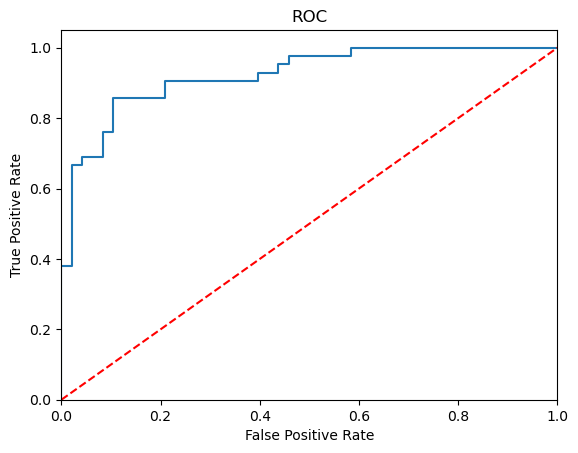

In [149]:
CBC_tuned = CatBoostClassifier(depth=4,iterations=70,learning_rate=0.03)
CBC_tuned.fit(x_train_std,y_train)
y_pred = CBC_tuned.predict(x_test_std)
check_results_of_classification('CatBoost tuned ',CBC_tuned,y_pred,y_test) 

In [155]:
models = [clf_tuned,
          svm_model_tuned,
          knn_tuned,
          model_logistic_tuned,dt,CBC_tuned,xgbc_tuned]
result3 = []
results3 = pd.DataFrame(columns = ["Models","Accuracy"])
for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(x_test_std)
    acc = model.score(x_test_std,y_test)
    result3 = pd.DataFrame([[names,acc*100]],columns = ["Models","Accuracy"])
    results3 = results3.append(result3)
results3

,Models,Accuracy
0,RandomForestClassifier,82.222222
0,SVC,81.111111
0,KNeighborsClassifier,83.333333
0,LogisticRegression,81.111111
0,DecisionTreeClassifier,93.333333
0,CatBoostClassifier,87.777778
0,XGBClassifier,82.222222


CatBoost tuned 
Accuracy: 0.8222222222222222
Precision: 0.8095238095238095
Recall: 0.8095238095238095
F1 Score: 0.8095238095238095


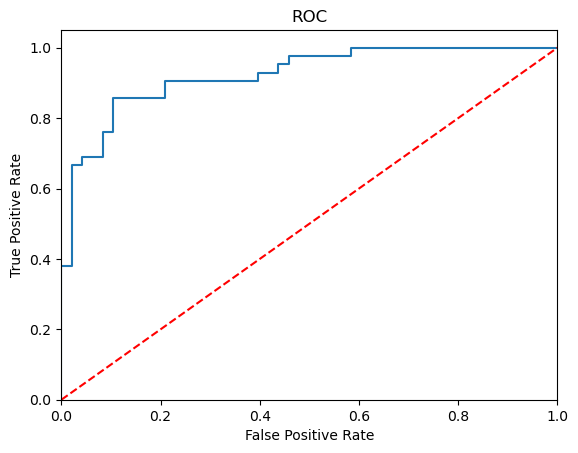

In [151]:
check_results_of_classification('CatBoost tuned ',CBC_tuned,y_pred,y_test) 

DTC 
Accuracy: 0.8222222222222222
Precision: 0.8095238095238095
Recall: 0.8095238095238095
F1 Score: 0.8095238095238095


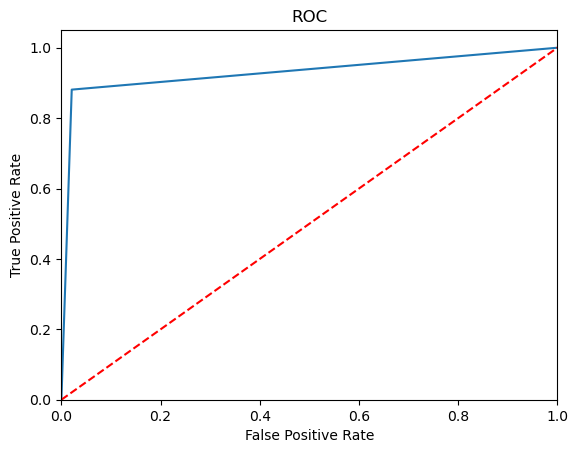

In [152]:
check_results_of_classification('DTC ',dt,y_pred,y_test) 